In [1]:
import os
from joblib import Parallel, delayed
import time
import numpy as np
import pickle
import pylab as pl
import pandas as pd

# import jupyternotify
import pylab as pl
import subprocess
import concurrent.futures
import shutil

# ip = get_ipython()
# ip.register_magics(jupyternotify.JupyterNotifyMagics)


In [2]:
# %%file node_setup/cre_setup_3_scale_1_node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 0,
# 1, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 1,
# 2, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 2,
# 3, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 3,
# 4, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 4,
# 5, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 5,
# 6, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 6,
# 7, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 7,
# 8, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 8,
# 9, 'europe-west3-c', 1, -1, 'FKA.pem', 0, -1,
# 10, 'europe-west3-c', 1, -1, 'FKA.pem', 1, -1,
# 11, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 9,
# 12, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 10,
# 13, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 11,
# 14, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 12,
# 15, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 13,
# 16, 'asia-south1-c', 1, -1, 'FKE.pem', 2, -1,

In [3]:
%%file node_setup/cre_setup_1_scale_1_node_info.csv
node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
0, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 0,
1, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 1,
2, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 2,
3, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 3,
4, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 4,
5, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 5,
6, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 6,
7, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 7,
8, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 8,
9, 'europe-west3-c', 1, -1, 'FKA.pem', 0, -1,
10, 'europe-west3-c', 1, -1, 'FKA.pem', 2, -1,
11, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 9,
12, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 10,
13, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 11,
14, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 12,
15, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 13,
16, 'asia-south1-c', 1, -1, 'FKE.pem', 1, -1,




Overwriting node_setup/cre_setup_1_scale_1_node_info.csv


In [4]:
# %%file node_setup/cre_setup_3_scale_5_node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 0,
# 1, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 1,
# 2, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 2,
# 3, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 3,
# 4, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 4,
# 5, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 5,
# 6, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 6,
# 7, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 7,
# 8, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 8,
# 9, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 9,
# 10, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 10,
# 11, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 11,
# 12, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 12,
# 13, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 13,
# 14, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 14,
# 15, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 15,
# 16, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 16,
# 17, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 17,
# 18, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 18,
# 19, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 19,
# 20, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 20,
# 21, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 21,
# 22, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 22,
# 23, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 23,
# 24, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 24,
# 25, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 25,
# 26, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 26,
# 27, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 27,
# 28, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 28,
# 29, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 29,
# 30, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 30,
# 31, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 31,
# 32, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 32,
# 33, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 33,
# 34, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 34,
# 35, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 35,
# 36, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 36,
# 37, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 37,
# 38, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 38,
# 39, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 39,
# 40, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 40,
# 41, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 41,
# 42, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 42,
# 43, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 43,
# 44, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 44,
# 45, 'europe-west3-c', 1, -1, 'FKA.pem', 0, -1,
# 46, 'europe-west3-c', 1, -1, 'FKA.pem', 1, -1,
# 47, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 45,
# 48, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 46,
# 49, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 47,
# 50, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 48,
# 51, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 49,
# 52, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 50,
# 53, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 51,
# 54, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 52,
# 55, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 53,
# 56, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 54,
# 57, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 55,
# 58, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 56,
# 59, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 57,
# 60, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 58,
# 61, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 59,
# 62, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 60,
# 63, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 61,
# 64, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 62,
# 65, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 63,
# 66, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 64,
# 67, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 65,
# 68, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 66,
# 69, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 67,
# 70, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 68,
# 71, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 69,
# 72, 'asia-south1-c', 1, -1, 'FKE.pem', 2, -1,




In [5]:
# %%file node_setup/cre_setup_2_scale_5_node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 0,
# 1, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 1,
# 2, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 2,
# 3, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 3,
# 4, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 4,
# 5, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 5,
# 6, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 6,
# 7, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 7,
# 8, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 8,
# 9, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 9,
# 10, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 10,
# 11, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 11,
# 12, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 12,
# 13, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 13,
# 14, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 14,
# 15, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 15,
# 16, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 16,
# 17, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 17,
# 18, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 18,
# 19, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 19,

# 20, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 20,
# 21, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 21,
# 22, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 22,
# 23, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 23,
# 24, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 24,
# 25, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 25,
# 26, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 26,
# 27, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 27,
# 28, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 28,
# 29, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 29,
# 30, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 30,
# 31, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 31,
# 32, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 32,
# 33, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 33,
# 34, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 34,
# 35, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 35,
# 36, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 36,
# 37, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 37,
# 38, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 38,
# 39, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 39,
# 40, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 40,
# 41, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 41,
# 42, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 42,
# 43, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 43,
# 44, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 44,

# 45, 'europe-west3-c', 1, -1, 'FKA.pem', 0, -1,
# 46, 'europe-west3-c', 1, -1, 'FKA.pem', 2, -1,

# 47, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 45,
# 48, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 46,
# 49, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 47,
# 50, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 48,
# 51, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 49,
# 52, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 50,
# 53, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 51,
# 54, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 52,
# 55, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 53,
# 56, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 54,
# 57, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 55,
# 58, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 56,
# 59, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 57,
# 60, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 58,
# 61, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 59,
# 62, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 60,
# 63, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 61,
# 64, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 62,
# 65, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 63,
# 66, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 64,
# 67, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 65,
# 68, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 66,
# 69, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 67,
# 70, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 68,
# 71, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 69,

# 72, 'asia-south1-c', 1, -1, 'FKE.pem', 1, -1,




In [6]:
# %%file node_setup/cre_setup_1_scale_5_node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 0,
# 1, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 1,
# 2, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 2,
# 3, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 3,
# 4, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 4,
# 5, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 5,
# 6, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 6,
# 7, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 7,
# 8, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 8,
# 9, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 9,
# 10, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 10,
# 11, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 11,
# 12, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 12,
# 13, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 13,
# 14, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 14,
# 15, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 15,
# 16, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 16,
# 17, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 17,
# 18, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 18,
# 19, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 19,

# 20, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 20,
# 21, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 21,
# 22, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 22,
# 23, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 23,
# 24, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 24,
# 25, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 25,
# 26, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 26,
# 27, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 27,
# 28, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 28,
# 29, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 29,
# 30, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 30,
# 31, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 31,
# 32, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 32,
# 33, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 33,
# 34, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 34,

# 35, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 35,
# 36, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 36,
# 37, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 37,
# 38, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 38,
# 39, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 39,
# 40, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 40,
# 41, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 41,
# 42, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 42,
# 43, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 43,
# 44, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 44,

# 45, 'europe-west3-c', 1, -1, 'FKA.pem', 0, -1,
# 46, 'europe-west3-c', 1, -1, 'FKA.pem', 2, -1,

# 47, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 45,
# 48, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 46,
# 49, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 47,
# 50, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 48,
# 51, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 49,
# 52, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 50,
# 53, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 51,
# 54, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 52,
# 55, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 53,
# 56, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 54,
# 57, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 55,
# 58, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 56,
# 59, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 57,
# 60, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 58,
# 61, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 59,
# 62, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 60,
# 63, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 61,
# 64, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 62,
# 65, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 63,
# 66, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 64,
# 67, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 65,
# 68, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 66,
# 69, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 67,
# 70, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 68,
# 71, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 69,

# 72, 'asia-south1-c', 1, -1, 'FKE.pem', 1, -1,




In [7]:
# %%file node_setup/cre_setup_2_scale_1_node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 0,
# 1, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 1,
# 2, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 2,
# 3, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 3,
# 4, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 4,
# 5, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 5,
# 6, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 6,
# 7, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 7,
# 8, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 8,
# 9, 'europe-west3-c', 1, -1, 'FKA.pem', 0, -1,
# 10, 'europe-west3-c', 1, -1, 'FKA.pem', 2, -1,
# 11, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 9,
# 12, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 10,
# 13, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 11,
# 14, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 12,
# 15, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 13,
# 16, 'asia-south1-c', 1, -1, 'FKE.pem', 1, -1,




In [8]:
# %%file node_setup/cre_setup_3_scale_2_node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 0,
# 1, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 1,
# 2, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 2,
# 3, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 3,
# 4, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 4,
# 5, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 5,
# 6, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 6,
# 7, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 7,
# 8, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 8,
# 9, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 9,
# 10, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 10,
# 11, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 11,
# 12, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 12,
# 13, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 13,
# 14, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 14,
# 15, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 15,
# 16, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 16,
# 17, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 17,
# 18, 'europe-west3-c', 1, -1, 'FKA.pem', 0, -1,
# 19, 'europe-west3-c', 1, -1, 'FKA.pem', 1, -1,
# 20, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 18,
# 21, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 19,
# 22, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 20,
# 23, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 21,
# 24, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 22,
# 25, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 23,
# 26, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 24,
# 27, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 25,
# 28, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 26,
# 29, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 27,
# 30, 'asia-south1-c', 1, -1, 'FKE.pem', 2, -1,

In [9]:
# %%file node_setup/cre_setup_3_scale_3_node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'ap-south-1', 0, 0, 'FKA.pem', -1, 0,
# 1, 'ap-south-1', 0, 0, 'FKA.pem', -1, 1,
# 2, 'ap-south-1', 0, 0, 'FKA.pem', -1, 2,
# 3, 'ap-south-1', 0, 0, 'FKA.pem', -1, 3,
# 4, 'ap-south-1', 0, 0, 'FKA.pem', -1, 4,
# 5, 'ap-south-1', 0, 0, 'FKA.pem', -1, 5,
# 6, 'ap-south-1', 0, 0, 'FKA.pem', -1, 6,
# 7, 'ap-south-1', 0, 0, 'FKA.pem', -1, 7,
# 8, 'ap-south-1', 0, 0, 'FKA.pem', -1, 8,
# 9, 'ap-south-1', 0, 0, 'FKA.pem', -1, 9,
# 10, 'ap-south-1', 0, 0, 'FKA.pem', -1, 10,
# 11, 'ap-south-1', 0, 0, 'FKA.pem', -1, 11,
# 12, 'ap-south-1', 0, 1, 'FKA.pem', -1, 12,
# 13, 'ap-south-1', 0, 1, 'FKA.pem', -1, 13,
# 14, 'ap-south-1', 0, 1, 'FKA.pem', -1, 14,
# 15, 'ap-south-1', 0, 1, 'FKA.pem', -1, 15,
# 16, 'ap-south-1', 0, 1, 'FKA.pem', -1, 16,
# 17, 'ap-south-1', 0, 1, 'FKA.pem', -1, 17,
# 18, 'ap-south-1', 0, 1, 'FKA.pem', -1, 18,
# 19, 'ap-south-1', 0, 1, 'FKA.pem', -1, 19,
# 20, 'ap-south-1', 0, 1, 'FKA.pem', -1, 20,
# 21, 'ap-south-1', 0, 1, 'FKA.pem', -1, 21,
# 22, 'ap-south-1', 0, 1, 'FKA.pem', -1, 22,
# 23, 'ap-south-1', 0, 1, 'FKA.pem', -1, 23,
# 24, 'ap-south-1', 0, 1, 'FKA.pem', -1, 24,
# 25, 'ap-south-1', 0, 1, 'FKA.pem', -1, 25,
# 26, 'ap-south-1', 0, 1, 'FKA.pem', -1, 26,
# 27, 'ap-south-1', 1, -1, 'FKA.pem', 0, -1,
# 28, 'ap-south-1', 1, -1, 'FKA.pem', 1, -1,
# 29, 'eu-central-1', 0, 2, 'FKE.pem', -1, 27,
# 30, 'eu-central-1', 0, 2, 'FKE.pem', -1, 28,
# 31, 'eu-central-1', 0, 2, 'FKE.pem', -1, 29,
# 32, 'eu-central-1', 0, 2, 'FKE.pem', -1, 30,
# 33, 'eu-central-1', 0, 2, 'FKE.pem', -1, 31,
# 34, 'eu-central-1', 0, 2, 'FKE.pem', -1, 32,
# 35, 'eu-central-1', 0, 2, 'FKE.pem', -1, 33,
# 36, 'eu-central-1', 0, 2, 'FKE.pem', -1, 34,
# 37, 'eu-central-1', 0, 2, 'FKE.pem', -1, 35,
# 38, 'eu-central-1', 0, 2, 'FKE.pem', -1, 36,
# 39, 'eu-central-1', 0, 2, 'FKE.pem', -1, 37,
# 40, 'eu-central-1', 0, 2, 'FKE.pem', -1, 38,
# 41, 'eu-central-1', 0, 2, 'FKE.pem', -1, 39,
# 42, 'eu-central-1', 0, 2, 'FKE.pem', -1, 40,
# 43, 'eu-central-1', 0, 2, 'FKE.pem', -1, 41,
# 44, 'eu-central-1', 1, -1, 'FKE.pem', 2, -1,




In [10]:
# %%file node_setup/cre_setup_3_scale_4_node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 0,
# 1, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 1,
# 2, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 2,
# 3, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 3,
# 4, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 4,
# 5, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 5,
# 6, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 6,
# 7, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 7,
# 8, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 8,
# 9, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 9,
# 10, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 10,
# 11, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 11,
# 12, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 12,
# 13, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 13,
# 14, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 14,
# 15, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 15,

# 16, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 16,
# 17, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 17,
# 18, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 18,
# 19, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 19,
# 20, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 20,
# 21, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 21,
# 22, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 22,
# 23, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 23,
# 24, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 24,
# 25, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 25,
# 26, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 26,
# 27, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 27,
# 28, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 28,
# 29, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 29,
# 30, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 30,
# 31, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 31,
# 32, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 32,
# 33, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 33,
# 34, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 34,
# 35, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 35,

# 36, 'europe-west3-c', 1, -1, 'FKA.pem', 0, -1,
# 37, 'europe-west3-c', 1, -1, 'FKA.pem', 2, -1,

# 38, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 36,
# 39, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 37,
# 40, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 38,
# 41, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 39,
# 42, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 40,
# 43, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 41,
# 44, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 42,
# 45, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 43,
# 46, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 44,
# 47, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 45,
# 48, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 46,
# 49, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 47,
# 50, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 48,
# 51, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 49,
# 52, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 50,
# 53, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 51,
# 54, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 52,
# 55, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 53,
# 56, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 54,
# 57, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 55,

# 58, 'asia-south1-c', 1, -1, 'FKE.pem', 1, -1,




In [11]:
# %%file node_setup/cre_setup_2_scale_2_node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 0,
# 1, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 1,
# 2, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 2,
# 3, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 3,
# 4, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 4,
# 5, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 5,
# 6, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 6,
# 7, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 7,
# 8, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 8,
# 9, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 9,
# 10, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 10,
# 11, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 11,
# 12, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 12,
# 13, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 13,
# 14, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 14,
# 15, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 15,
# 16, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 16,
# 17, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 17,

# 18, 'europe-west3-c', 1, -1, 'FKA.pem', 0, -1,
# 19, 'europe-west3-c', 1, -1, 'FKA.pem', 2, -1,

# 20, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 18,
# 21, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 19,
# 22, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 20,
# 23, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 21,
# 24, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 22,
# 25, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 23,
# 26, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 24,
# 27, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 25,
# 28, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 26,
# 29, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 27,

# 30, 'asia-south1-c', 1, -1, 'FKE.pem', 1, -1,




In [12]:
# %%file node_setup/cre_setup_1_scale_2_node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 0,
# 1, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 1,
# 2, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 2,
# 3, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 3,
# 4, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 4,
# 5, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 5,
# 6, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 6,
# 7, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 7,
# 8, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 8,
# 9, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 9,
# 10, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 10,
# 11, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 11,
# 12, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 12,
# 13, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 13,
# 14, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 14,
# 15, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 15,
# 16, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 16,
# 17, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 17,

# 18, 'europe-west3-c', 1, -1, 'FKA.pem', 0, -1,
# 19, 'europe-west3-c', 1, -1, 'FKA.pem', 2, -1,

# 20, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 18,
# 21, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 19,
# 22, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 20,
# 23, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 21,
# 24, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 22,
# 25, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 23,
# 26, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 24,
# 27, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 25,
# 28, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 26,
# 29, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 27,

# 30, 'asia-south1-c', 1, -1, 'FKE.pem', 1, -1,




In [13]:
# %%file node_setup/cre_setup_1_scale_3_node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 0,
# 1, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 1,
# 2, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 2,
# 3, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 3,
# 4, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 4,
# 5, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 5,
# 6, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 6,
# 7, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 7,
# 8, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 8,
# 9, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 9,
# 10, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 10,
# 11, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 11,
# 12, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 12,
# 13, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 13,
# 14, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 14,
# 15, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 15,
# 16, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 16,
# 17, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 17,
# 18, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 18,
# 19, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 19,
# 20, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 20,
# 21, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 21,
# 22, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 22,
# 23, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 23,
# 24, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 24,
# 25, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 25,
# 26, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 26,

# 27, 'europe-west3-c', 1, -1, 'FKA.pem', 0, -1,
# 28, 'europe-west3-c', 1, -1, 'FKA.pem', 2, -1,

# 29, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 27,
# 30, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 28,
# 31, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 29,
# 32, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 30,
# 33, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 31,
# 34, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 32,
# 35, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 33,
# 36, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 34,
# 37, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 35,
# 38, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 36,
# 39, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 37,
# 40, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 38,
# 41, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 39,
# 42, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 40,
# 43, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 41,

# 44, 'asia-south1-c', 1, -1, 'FKE.pem', 1, -1,




In [14]:
# %%file node_setup/cre_setup_2_scale_3_node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 0,
# 1, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 1,
# 2, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 2,
# 3, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 3,
# 4, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 4,
# 5, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 5,
# 6, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 6,
# 7, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 7,
# 8, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 8,
# 9, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 9,
# 10, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 10,
# 11, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 11,
# 12, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 12,
# 13, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 13,
# 14, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 14,
# 15, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 15,
# 16, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 16,
# 17, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 17,
# 18, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 18,
# 19, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 19,
# 20, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 20,
# 21, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 21,
# 22, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 22,
# 23, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 23,
# 24, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 24,
# 25, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 25,
# 26, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 26,
# 27, 'europe-west3-c', 1, -1, 'FKA.pem', 0, -1,
# 28, 'europe-west3-c', 1, -1, 'FKA.pem', 2, -1,
# 29, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 27,
# 30, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 28,
# 31, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 29,
# 32, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 30,
# 33, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 31,
# 34, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 32,
# 35, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 33,
# 36, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 34,
# 37, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 35,
# 38, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 36,
# 39, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 37,
# 40, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 38,
# 41, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 39,
# 42, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 40,
# 43, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 41,
# 44, 'asia-south1-c', 1, -1, 'FKE.pem', 1, -1,




In [15]:
# %%file node_setup/cre_setup_2_scale_4_node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 0,
# 1, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 1,
# 2, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 2,
# 3, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 3,
# 4, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 4,
# 5, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 5,
# 6, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 6,
# 7, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 7,
# 8, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 8,
# 9, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 9,
# 10, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 10,
# 11, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 11,
# 12, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 12,
# 13, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 13,
# 14, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 14,
# 15, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 15,

# 16, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 16,
# 17, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 17,
# 18, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 18,
# 19, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 19,
# 20, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 20,
# 21, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 21,
# 22, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 22,
# 23, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 23,
# 24, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 24,
# 25, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 25,
# 26, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 26,
# 27, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 27,
# 28, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 28,
# 29, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 29,
# 30, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 30,
# 31, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 31,
# 32, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 32,
# 33, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 33,
# 34, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 34,
# 35, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 35,

# 36, 'europe-west3-c', 1, -1, 'FKA.pem', 0, -1,
# 37, 'europe-west3-c', 1, -1, 'FKA.pem', 2, -1,

# 38, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 36,
# 39, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 37,
# 40, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 38,
# 41, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 39,
# 42, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 40,
# 43, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 41,
# 44, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 42,
# 45, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 43,
# 46, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 44,
# 47, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 45,
# 48, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 46,
# 49, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 47,
# 50, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 48,
# 51, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 49,
# 52, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 50,
# 53, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 51,
# 54, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 52,
# 55, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 53,
# 56, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 54,
# 57, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 55,

# 58, 'asia-south1-c', 1, -1, 'FKE.pem', 1, -1,




In [16]:
# %%file node_setup/cre_setup_1_scale_4_node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 0,
# 1, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 1,
# 2, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 2,
# 3, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 3,
# 4, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 4,
# 5, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 5,
# 6, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 6,
# 7, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 7,
# 8, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 8,
# 9, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 9,
# 10, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 10,
# 11, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 11,
# 12, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 12,
# 13, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 13,
# 14, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 14,
# 15, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 15,

# 16, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 16,
# 17, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 17,
# 18, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 18,
# 19, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 19,
# 20, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 20,
# 21, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 21,
# 22, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 22,
# 23, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 23,
# 24, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 24,
# 25, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 25,
# 26, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 26,
# 27, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 27,
# 28, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 28,
# 29, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 29,
# 30, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 30,
# 31, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 31,
# 32, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 32,
# 33, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 33,
# 34, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 34,
# 35, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 35,

# 36, 'europe-west3-c', 1, -1, 'FKA.pem', 0, -1,
# 37, 'europe-west3-c', 1, -1, 'FKA.pem', 2, -1,

# 38, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 36,
# 39, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 37,
# 40, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 38,
# 41, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 39,
# 42, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 40,
# 43, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 41,
# 44, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 42,
# 45, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 43,
# 46, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 44,
# 47, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 45,
# 48, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 46,
# 49, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 47,
# 50, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 48,
# 51, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 49,
# 52, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 50,
# 53, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 51,
# 54, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 52,
# 55, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 53,
# 56, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 54,
# 57, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 55,

# 58, 'asia-south1-c', 1, -1, 'FKE.pem', 1, -1,




In [17]:
# config_list = ['cre_setup_1_scale_1_node_info',\
#                'cre_setup_1_scale_2_node_info',\
#                'cre_setup_1_scale_3_node_info',\
#                'cre_setup_1_scale_5_node_info',\
#                'cre_setup_2_scale_1_node_info',\
#                'cre_setup_2_scale_2_node_info',\
#                'cre_setup_2_scale_3_node_info',\
#                'cre_setup_2_scale_5_node_info',\
#                'cre_setup_3_scale_1_node_info',\
#                'cre_setup_3_scale_2_node_info',\
#                'cre_setup_3_scale_3_node_info',\
#                'cre_setup_3_scale_4_node_info',\
#                'cre_setup_3_scale_5_node_info']



config_list = ['cre_setup_1_scale_1_node_info']

In [18]:
# config_file = config_list[0]

In [19]:
def run_bftsmart_mc(config_file):


    os.system('cp node_setup/'+config_file+'.csv node_info.csv')


    df =pd.read_csv('node_info.csv')

    node_info_dict = df.to_dict()

    node_info_dict

    total_count = 0

    for key in node_info_dict['ServerOrClientregion'].keys():
        if node_info_dict['ServerOrClientregion'][key] ==0:
            total_count = total_count + 1

    total_count

    replica_count = 0

    for key in node_info_dict['cluster_id'].keys():
        if node_info_dict['cluster_id'][key] ==0:
            replica_count = replica_count + 1


    replica_count       

    node_info_dict

    n_clusters = int(total_count / replica_count)

    nclients = 0

    for i in node_info_dict['ServerOrClientregion']:
    #     print(node_info_dict['ServerOrClientregion'][i])
        if node_info_dict['ServerOrClientregion'][i] == 1:
            nclients = nclients + 1
    nclients

    clusters_tracked = []
    cluster_regions_tracked = []

    for key in node_info_dict['region']:
        if int(node_info_dict['cluster_id'][key]) not in clusters_tracked and int(node_info_dict['cluster_id'][key]) >=0:
            clusters_tracked.append(int(node_info_dict['cluster_id'][key]))
            cluster_regions_tracked.append(node_info_dict['region'][key].strip().replace('"', '')[1:-1])


    cluster_regions_tracked     

    cluster_regions_tracked, clusters_tracked


    regions = cluster_regions_tracked


    # regions = [ 'us-west1-b','us-west1-b', 'us-west1-b','us-west1-b',\
    #            'europe-west3-c', 'europe-west3-c', 'europe-west3-c', 'europe-west3-c', \
    #            'asia-south1-c', 'asia-south1-c', 'asia-south1-c', 'asia-south1-c']


    # regions = [ 'us-west1-b','us-west1-b', 'us-west1-b','us-west1-b']


    # regions = [ 'us-west1-b','us-west1-b', 'us-west1-b','us-west1-b',\
    #            'us-west1-b', 'us-west1-b', 'us-west1-b', 'us-west1-b', \
    #            'us-west1-b', 'us-west1-b', 'us-west1-b', 'us-west1-b']



    # regions = [ 'europe-west3-c', 'asia-south1-c']

    # regions = [ 'us-west1-b', 'us-west1-b']



    # regions = [ 'us-west1-b', 'us-west1-b','us-west1-b','us-west1-b', 'us-west1-b', 'us-west1-b','us-west1-b','us-west1-b', 'us-west1-b', 'us-west1-b','us-west1-b','us-west1-b']
    # regions = [ 'us-west1-b', 'us-west1-b', 'us-west1-b', 'us-west1-b']



    # regions = ['europe-west3-c',  \
    #            'asia-south1-c']


    n_regions = len(regions)

    for i,k in enumerate(regions):
        print(i,k)

    for item, idx in enumerate(node_info_dict['region'].keys()):
        print(item, idx, node_info_dict['region'][item])

    lines  = []
    # zones = {}


    # lim = 0
    # for reg in regions:
    #     for i in range(replica_count+int(nclients/n_clusters)):
    #         line = 'gcloud compute instances create resdb-'+f"{lim+i:02}"+' --project=ucr-ursa-major-lesani-lab --zone='+reg+' --machine-type=e2-highmem-2 --network-interface=network-tier=PREMIUM,stack-type=IPV4_ONLY,subnet=default --can-ip-forward --maintenance-policy=MIGRATE --provisioning-model=STANDARD --service-account=961693926925-compute@developer.gserviceaccount.com --scopes=https://www.googleapis.com/auth/devstorage.read_only,https://www.googleapis.com/auth/logging.write,https://www.googleapis.com/auth/monitoring.write,https://www.googleapis.com/auth/servicecontrol,https://www.googleapis.com/auth/service.management.readonly,https://www.googleapis.com/auth/trace.append --tags=http-server,https-server --create-disk=auto-delete=yes,boot=yes,device-name=instance-3,image=projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831,mode=rw,size=10,type=projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/diskTypes/pd-balanced --no-shielded-secure-boot --shielded-vtpm --shielded-integrity-monitoring --labels=goog-ec-src=vm_add-gcloud --reservation-affinity=any'

    #         print(line)
    #         lines.append(line)
    #         zones[i] = reg

    #     lim = lim + replica_count+int(nclients/n_clusters)




    # with open('launch_cloud_instances.sh', 'w') as f:
    #     for item in lines:
    #         f.write(str(item) + '\n')


    for idx, key in enumerate( node_info_dict['region'].keys()):

        line = 'gcloud compute instances create resdb-'+f"{idx:02}"+' --project=ucr-ursa-major-lesani-lab --zone='+node_info_dict['region'][key].strip()[1:-1]+' --machine-type=e2-highmem-2 --network-interface=network-tier=PREMIUM,stack-type=IPV4_ONLY,subnet=default --can-ip-forward --maintenance-policy=MIGRATE --provisioning-model=STANDARD --service-account=961693926925-compute@developer.gserviceaccount.com --scopes=https://www.googleapis.com/auth/devstorage.read_only,https://www.googleapis.com/auth/logging.write,https://www.googleapis.com/auth/monitoring.write,https://www.googleapis.com/auth/servicecontrol,https://www.googleapis.com/auth/service.management.readonly,https://www.googleapis.com/auth/trace.append --tags=http-server,https-server --create-disk=auto-delete=yes,boot=yes,device-name=instance-3,image=projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831,mode=rw,size=10,type=projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/diskTypes/pd-balanced --no-shielded-secure-boot --shielded-vtpm --shielded-integrity-monitoring --labels=goog-ec-src=vm_add-gcloud --reservation-affinity=any'
        lines.append(line)

    with open('launch_cloud_instances.sh', 'w') as f:
        for item in lines:
            f.write(str(item) + '\n')


    len(lines), node_info_dict['region'][key].strip()[1:-1]


    def run_command(command):
        subprocess.call(command, shell=True)

    commands = lines

    # Create a ThreadPoolExecutor or ProcessPoolExecutor, depending on your needs
    with concurrent.futures.ThreadPoolExecutor(max_workers=len(commands)) as executor:
        # Submit each command to the executor for parallel execution
        futures = [executor.submit(run_command, command) for command in commands]

        # Wait for all tasks to complete
        concurrent.futures.wait(futures)

    time.sleep(30)

    # os.system('sh launch_cloud_instances.sh')

    for folder in os.listdir('.'):
        if 'config' in folder and folder!='config' and 'zip' not in folder and '.' not in folder:
            shutil.rmtree(folder)

    # os.system("aws --region ap-south-1 ec2 describe-instances --filter Name=instance-type,Values=t2.small --query 'Reservations[*].Instances[*].[PrivateIpAddress]' --output text > all_internal_ips")

    # os.system("aws --region ap-south-1 ec2 describe-instances  --filter Name=instance-type,Values=t2.small --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text > all_external_ips")

    instance_type = 'e2-small'


    redirect = '>'

    os.system('gcloud compute instances list  --format="value(networkInterfaces[0].networkIP)" '+\
              redirect+' all_internal_ips')



    os.system('gcloud compute instances list --format="value(networkInterfaces[0].networkIP)" '+\
          redirect+' all_external_ips')

    with open('all_internal_ips') as f:
        ipList = f.read().splitlines()
    ipList = [x for x in ipList if x!='None']

    ipList, len(ipList)

    new_server_only_ips= []
    new_client_only_ips= []



    for i in range(total_count + nclients):
        if node_info_dict['ServerOrClientregion'][i] ==0:
            new_server_only_ips = new_server_only_ips + [ipList[i]]
        else:
            new_client_only_ips = new_client_only_ips + [ipList[i]]



    # new_server_only_ips= []
    # new_client_only_ips= []


    # current_region_total = 0
    # for i in range(n_regions):
    #     print(current_region_total,current_region_total+ clusters_per_region_map[i] *replica_count)
    #     new_server_only_ips = new_server_only_ips + ipList[current_region_total:current_region_total+ clusters_per_region_map[i] *replica_count]

    #     new_client_only_ips = new_client_only_ips + ipList[current_region_total+ clusters_per_region_map[i] *replica_count:
    #                                                       current_region_total+ clusters_per_region_map[i] *(replica_count+1)]


    #     current_region_total = current_region_total + clusters_per_region_map[i] *replica_count +  clusters_per_region_map[i]

    new_server_only_ips, len(new_server_only_ips)

    new_client_only_ips, len(new_client_only_ips) 

    # ipList = new_server_only_ips + new_client_only_ips

    # ipList, len(ipList)

    nclients = 0
    nservers = 0
    count = 0

    clusterIpMap = {}


    for i in node_info_dict['ServerOrClientregion']:
    #     print(node_info_dict['ServerOrClientregion'][i])

        if node_info_dict['ServerOrClientregion'][i] == 0:
            clusterIpMap[nservers] = ipList[count]
            nservers = nservers + 1

        count = count + 1

    nclients = 0
    nservers = 0
    count = 0

    for i in node_info_dict['ServerOrClientregion']:
    #     print(node_info_dict['ServerOrClientregion'][i])

        if node_info_dict['ServerOrClientregion'][i] == 1:
            print('test: ', 7001+nclients, ipList[count])
            clusterIpMap[7001+nclients] = ipList[count]
            nclients = nclients + 1

        count = count + 1

    clusterIpMap

    # clusterIpMap = {}

    # for i in range(len(ipList)):
    #     clusterIpMap[i] = ipList[i]


    # for i in range(nclients):

    #     clusterIpMap[7001+i] = ipList[-(nclients-i)]

    clusterPortMap1 = {}
    clusterPortMap2 = {}

    for i in range(len(ipList) - nclients):

        clusterPortMap1[i] = str(10000)

    for i in range(len(ipList) - nclients):
        clusterPortMap2[i] = str(20000)

    # clusterPortMap1[7003] = '11400'
    # clusterPortMap2[7003] = '11410'



    temp = 11900

    for i in range(nclients):

        clusterPortMap1[7001+i] = str(10000)
        clusterPortMap2[7001+i] = str(20000)

    clusterPortMap1, clusterPortMap2

    os.system('echo 3108 | sudo -S ./gradlew installDist')

    for i in range(total_count):
        os.system('./runscripts/smartrun.sh bftsmart.tom.util.RSAKeyPairGenerator '+str(i)+' 1024')



    os.system('./runscripts/smartrun.sh bftsmart.tom.util.RSAKeyPairGenerator '+str(7002)+' 1024')
    os.system('./runscripts/smartrun.sh bftsmart.tom.util.RSAKeyPairGenerator '+str(7001)+' 1024')

    os.system('echo 3108 | sudo -S ./gradlew clean')

    for key in clusterPortMap1.keys():
        if key>7002:
    #         print(key)
            print()

            for folder in os.listdir('config/'):
                if os.path.isdir('config/'+folder) and 'keys' in folder:
                    if os.path.exists('config/'+folder+'/'+'privatekey7001'):
                        shutil.copy('config/'+folder+'/'+'privatekey7001','config/'+folder+'/'+'privatekey'+str(key))
                        shutil.copy('config/'+folder+'/'+'publickey7001','config/'+folder+'/'+'publickey'+str(key))

            print('----------')
            print()

    for i in range(n_clusters):

        if os.path.exists('config'+str(i)):
            shutil.rmtree('config'+str(i))

        os.mkdir('config'+str(i))
        os.mkdir('config'+str(i)+'/keysRSA')
        os.mkdir('config'+str(i)+'/keysSunEC')
        os.mkdir('config'+str(i)+'/keysECDSA')

    #     print('config'+str(i)+'/keysECDSA')


        shutil.copytree('config/workloads/', 'config'+str(i)+'/workloads')
        shutil.copytree('config/keysSSL_TLS/', 'config'+str(i)+'/keysSSL_TLS')
    #     print('config/workloads/', 'config'+str(i)+'/workloads')


        for file in os.listdir('config/keys/'):

            shutil.copy('config/keys/'+file, 'config'+str(i)+'/keysRSA/'+file)
            shutil.copy('config/keys/'+file, 'config'+str(i)+'/keysSunEC/'+file)
            shutil.copy('config/keys/'+file, 'config'+str(i)+'/keysECDSA/'+file)


        shutil.copy('config/system.config', 'config'+str(i)+'/system.config')    
        shutil.copy('config/logback.xml', 'config'+str(i)+'/logback.xml')





    clusterIpMap, clusterPortMap1

    def find_key_by_value(dictionary, value):
        for key, val in dictionary.items():
            if val == value:
                return key
        # If the value is not found, you might want to handle this case accordingly.
        return None


    node_info_dict

    find_key_by_value(node_info_dict['ServerID'], 4)

    for n_cluster in range(n_clusters):

        with open('config'+str(n_cluster)+'/hosts.config','w') as file:

            for key in clusterIpMap:
                if key < 7000:
                    file.writelines(str(key)+' '+clusterIpMap[key]+' '  +clusterPortMap1[key]+' ' +  clusterPortMap2[key]+' '+str(node_info_dict['cluster_id'][find_key_by_value(node_info_dict['ServerID'], key)] )+'\n')
                    print('test: ',str(key)+' '+clusterIpMap[key]+' '  +clusterPortMap1[key]+' ' +  clusterPortMap2[key]+' '+str(node_info_dict['cluster_id'][find_key_by_value(node_info_dict['ServerID'], key)] )+'\n')
            for key in clusterIpMap:
                if key >= 7000:
                    file.writelines(str(key)+' '+clusterIpMap[key]+' '+clusterPortMap1[key]+'\n')
                    print('test: ', str(key)+' '+clusterIpMap[key]+' '+clusterPortMap1[key]+'\n')

            file.close()


    # for n_cluster in range(n_clusters):

    #     with open('config'+str(n_cluster)+'/hosts.config','w') as file:

    #         for n_cluster1 in range(n_clusters):

    #             for i_replica in range(replica_count):
    #     #             file.writelines(str(i_replica)+' '+clusterIpMap[n_cluster*replica_count+i_replica]+' '  +clusterPortMap1[n_cluster*replica_count+i_replica]+' ' +  clusterPortMap2[n_cluster*replica_count+i_replica]+'\n')
    #                 file.writelines(str(n_cluster1*replica_count+i_replica)+' '+clusterIpMap[n_cluster1*replica_count+i_replica]+' '  +clusterPortMap1[n_cluster1*replica_count+i_replica]+' ' +  clusterPortMap2[n_cluster1*replica_count+i_replica]+' '+str(n_cluster1)+'\n')

    #         for iter_ in range(len(ipList) - (n_clusters*replica_count)-nclients):
    #             print((n_clusters*replica_count) + iter_)

    # #             file.writelines(str((n_clusters*replica_count) + iter_)+' '+clusterIpMap[(n_clusters*replica_count) + iter_]+' '  +clusterPortMap1[(n_clusters*replica_count) + iter_]+' ' +  clusterPortMap2[(n_clusters*replica_count) + iter_]+' '+str(iter_%n_clusters)+'\n')
    #             file.writelines(str((n_clusters*replica_count) + iter_)+' '+clusterIpMap[(n_clusters*replica_count) + iter_]+' '  +clusterPortMap1[(n_clusters*replica_count) + iter_]+' ' +  clusterPortMap2[(n_clusters*replica_count) + iter_]+' '+str(0%n_clusters)+'\n')

    #         for i in range(nclients):
    #             file.writelines(str(7001+i)+' '+clusterIpMap[7001+i]+' '+clusterPortMap1[7001+i]+'\n')


    #         file.close()


    replica_count

    # for n_cluster in range(n_clusters):
    #     with open('config'+str(n_cluster)+'/system.config','r') as file:
    #         data = file.readlines()
    #         f = int(np.ceil((replica_count-1)/3))
    #         print('f is',f )

    #         for n_line in range(len(data)):
    #             if ('system.servers.num' in data[n_line]) and '#' not in data[n_line]:


    #                 data[n_line] = 'system.servers.num = '+str(replica_count)
    #                 print(data[n_line])

    #             if ('system.servers.f' in data[n_line]) and '#' not in data[n_line]:
    #                 data[n_line] = 'system.servers.f = '+str(f)
    #                 print(data[n_line])


    #             if ('system.initial.view' in data[n_line]) and '#' not in data[n_line]:
    #                 data[n_line] = 'system.initial.view = '
    #                 for iter_view in range(replica_count):
    #                     data[n_line] = data[n_line] +str(n_cluster*replica_count+iter_view)+','
    # #                     data[n_line] = data[n_line] +str(n_cluster*replica_count+iter_view)+','
    #                     print(data[n_line])

    #                 data[n_line] = data[n_line][:-1]
    #                 print(data[n_line])



    #         file.close()

    #     with open('config'+str(n_cluster)+'/system.config', 'w') as f:
    #         for line in data:
    #             f.write(f"{line}\n")




    for n_cluster in range(n_clusters):
        with open('config'+str(n_cluster)+'/system.config','r') as file:
            data = file.readlines()


            nservers = 0
            server_id_list = []



            for i in node_info_dict['ServerOrClientregion']:
                if node_info_dict['ServerOrClientregion'][i] == 0 and \
                node_info_dict['cluster_id'][i]  == n_cluster:
                    nservers = nservers + 1
                    server_id_list.append(node_info_dict['ServerID'][i])

            f = int(np.ceil((nservers-1)/3))
            print('f is',f )


            for n_line in range(len(data)):
                if ('system.servers.num' in data[n_line]) and '#' not in data[n_line]:


                    data[n_line] = 'system.servers.num = '+str(nservers)
                    print(data[n_line])

                if ('system.servers.f' in data[n_line]) and '#' not in data[n_line]:
                    data[n_line] = 'system.servers.f = '+str(f)
                    print(data[n_line])


                if ('system.initial.view' in data[n_line]) and '#' not in data[n_line]:
                    data[n_line] = 'system.initial.view = '
                    for iter_view in server_id_list:
                        data[n_line] = data[n_line] +str(iter_view)+','
    #                     data[n_line] = data[n_line] +str(n_cluster*replica_count+iter_view)+','
                        print(data[n_line])

                    data[n_line] = data[n_line][:-1]
                    print(data[n_line])



            file.close()

        with open('config'+str(n_cluster)+'/system.config', 'w') as f:
            for line in data:
                f.write(f"{line}\n")


    for n_cluster in range(n_clusters):
        for i in range(400):

            for ncls in  range(1):


    #             print('config'+str(n_cluster)+'/keysRSA/'+'publickey7002', \
    #                         'config'+str(n_cluster)+'/keysRSA/'+'publickey'+str(1000+(ncls*100)+i))



                shutil.copy('config'+str(n_cluster)+'/keysRSA/'+'publickey7002', \
                            'config'+str(n_cluster)+'/keysRSA/'+'publickey'+str(1000+(ncls*100)+i))
                shutil.copy('config'+str(n_cluster)+'/keysRSA/'+'privatekey7002', \
                            'config'+str(n_cluster)+'/keysRSA/'+'privatekey'+str(1000+(ncls*100)+i))

    #         shutil.copy('config'+str(n_cluster)+'/keysRSA/'+'publickey7002', \
    #                     'config'+str(n_cluster)+'/keysRSA/'+'publickey7002')

    #         shutil.copy('config'+str(n_cluster)+'/keysRSA/'+'privatekey7002', \
    #                     'config'+str(n_cluster)+'/keysRSA/'+'privatekey7002')

    # os.system('git remote set-url origin https://github.com/tmane002/BftSmart_Final.git')

    os.system('git add .; git commit -m "Working with modified ClusterInfo";git push')

    time.sleep(30)

    # regions = [ 'us-west1-b', 'us-west1-b', 'us-west1-b']
    # regions = [ 'us-west1-b']


    instance_type = 'e2-small'

    df =pd.read_csv('node_info.csv')

    node_info_dict = df.to_dict()

    node_info_dict

    f = open('all_external_ips', "r")
    data1 = [line.strip() for line in f.readlines()]

    data1 = [x for x in data1 if x!='None']

    f = open('all_internal_ips', "r")
    data2 = [line.strip() for line in f.readlines()]

    data2 = [x for x in data2 if x!='None']

    data2, len(data2)

    data = []

    skip_instances = 0

    for i in range(skip_instances, len(data1)):
        if data1[i]!='None':
            data.append(data1[i] + '    ' + data2[i])

    data, len(data)

    for index, item in enumerate(data1):
        if 'publicIP' not in node_info_dict.keys():
            node_info_dict['publicIP'] = {}


        node_info_dict['publicIP'][index] = item 


    for index, item in enumerate(data2):
        if 'privateIP' not in node_info_dict.keys():
            node_info_dict['privateIP'] = {}

        node_info_dict['privateIP'][index] = item 



    for index, item in enumerate(data):
        if 'publicAndprivateIP' not in node_info_dict.keys():
            node_info_dict['publicAndprivateIP'] = {}

        node_info_dict['publicAndprivateIP'][index] = item 

    node_info_dict









    # time.sleep(60)

    total_count = 0

    for key in node_info_dict['ServerOrClientregion'].keys():
        if node_info_dict['ServerOrClientregion'][key] ==0:
            total_count = total_count + 1

    total_count





    def getTimeThps(file, flag):

        f = open(file, "r")
        data = f.readlines() 

        times = []
        thputs = []
        for line in data:
            if 'throughput[ops/s]' in line:
                lineData = (line[13+line.find('max[ops/s])>'):-2])
                print(lineData)

                times.append(lineData.split('|')[0])
                thputs.append(lineData.split('|')[-2])
        if (flag): 
            times.append(float(times[-1])+abs(float(times[-1]) - float(times[-2]) ))
            thputs.append(0)

        return np.array(times).astype(float), np.array(thputs).astype(float) 

    with open('all_external_ips') as f:
        lines = f.read().splitlines()


    lines = [x for x in lines if x!='None']
    lines, len(lines)

    for ip in lines:
        if ip!='None':
            current = (ip.split('.'))

            print('ssh -i "FinalKeys.pem" ubuntu@ec2-'+str(current[0])+'-'\
                  +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com')

    ## Set number of clusters

    nclusters = 0

    for folder in os.listdir('.'):
        if 'config' in folder and folder!='config':
            nclusters = nclusters + 1


    print(nclusters)





    nreplicas = int(total_count/nclusters)
    nclients = nclusters


    nodeIps = []
    clientIps = []

    for i in range(total_count + nclients):
        if node_info_dict['ServerOrClientregion'][i] ==0:
            nodeIps.append(lines[i])
        else:
            clientIps.append(lines[i])


    # nodeIps = lines[:nclusters* nreplicas]


    # no_cluster_yet_nodes = lines[nclusters* nreplicas:-(nclusters)]
    no_cluster_yet_nodes = lines[nclusters* nreplicas:-nclients]



    # clientIps = lines[-(nclusters):]



    # clientIps = lines[-nclients:]



    clientIps, no_cluster_yet_nodes



    node_info_dict

    node_info_dict['region'][0].strip()

    ## Functions

    def setup(i):

        ip = node_info_dict['publicIP'][i] 
        if ip!='None':
            current = (ip.split('.'))
            command = 'gcloud compute scp --zone "'+str(node_info_dict['region'][i].strip()[1:-1]) +'"'+' commands.sh'+' resdb-'+f"{i:02}"+':/home/tejas/commands.sh'

            print(command)
            os.system(command)

    def initialize(i):
        ip = node_info_dict['publicIP'][i] 
        if ip!='None':
            current = (ip.split('.'))
            command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "sudo sh commands.sh"'


            os.system(command)


    def git_clone(i):
        ip = lines[i]
        if ip!='None':
            current = (ip.split('.'))
            command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command " sudo git clone https://github.com/tmane002/BftSmart_Final.git"'


            os.system(command)

    def git_pull(i):
        ip = node_info_dict['publicIP'][i] 
        if ip!='None':
            current = (ip.split('.'))
            command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "git config --global --add safe.directory /home/tejas/BftSmart_Final; cd BftSmart_Final; sudo git pull"'


            os.system(command)

    def compile_job(i):
        ip = node_info_dict['publicIP'][i] 
        if ip!='None':
            current = (ip.split('.'))
            command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd BftSmart_Final; sudo ./gradlew installDist"'


            os.system(command)



    def clean_job(i):
        ip = node_info_dict['publicIP'][i] 

        rm_command = 'sudo rm config/currentView; '
        for iter_ in range(nclusters):
            rm_command = rm_command + 'sudo rm config'+str(iter_)+'/currentView; '


        if ip!='None':
            current = (ip.split('.'))
            command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "sudo rm nohup.out; cd BftSmart_Final; '+rm_command+'"'


            os.system(command)


    def clean_all(i):
        ip = node_info_dict['publicIP'][i] 

        rm_command = 'sudo rm -r BftSmart_Final; sudo rm nohup.out;sudo rm nohup_client.out;'



        if ip!='None':
            current = (ip.split('.'))
            command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "sudo rm nohup.out; '+rm_command+'"'


            os.system(command)





    #     if ip!='None' and( ip in no_cluster_yet_nodes):

    #         current = (ip.split('.'))
    #         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
    #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.ap-south-1.compute.amazonaws.com -T "cd BftSmart_Final; sudo nohup ./runscripts/startReplicaYCSB.sh '+str(i)+' >../nohup.out 2>&1 &"'


    #         os.system(command)        
    # #         print(command)

    def check_node(i):
        ip = node_info_dict['publicIP'][i] 
        if ip!='None':
            current = (ip.split('.'))
            command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "tail -n 1000 nohup.out"'


            os.system(command)
    #         print(command)


    def run_basic_client(i):
        cmd_arg = ''

        ip = node_info_dict['publicIP'][i] 

        if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:

            current = (ip.split('.'))


            cmd_arg = str(node_info_dict['clientID'][i])



            current = (ip.split('.'))
            command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd BftSmart_Final; sudo nohup ./runscripts/ycsbClient.sh '+str(cmd_arg)+' >../nohup_client.out 2>&1 &"'


            os.system(command)


    def kill_java(i):
        ip = node_info_dict['publicIP'][i] 

        if ip!='None':
            current = (ip.split('.'))
            command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd BftSmart_Final; sudo killall java; sudo killall nohup; sudo killall hotstuff-app; sudo killall hotstuff-client;"'


            os.system(command)



    def kill_clients(i):
        ip = node_info_dict['publicIP'][i] 
        if ip!='None' and ip in clientIps:
            current = (ip.split('.'))
            command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
                  +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd BftSmart_Final; sudo killall java; sudo killall nohup"'


            os.system(command)

    def run_server_node_check(i):
        ip = node_info_dict['publicIP'][i] 

        if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:

            current = (ip.split('.'))
            command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
                  +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd BftSmart_Final; sudo nohup ./runscripts/startReplicaYCSB.sh '+str(i)+' >../nohup.out 2>&1 &"'


            print(command)



    # for i in range(len(lines)):
    #     run_server_node_check(i)

    def run_basic_client_check(i):
        cmd_arg = ''

        ip = node_info_dict['publicIP'][i] 
        if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:

            cmd_arg = str(node_info_dict['clientID'][i])


    #         print(i, cmd_arg)

            current = (ip.split('.'))
            command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
                  +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com "cd BftSmart_Final; sudo nohup ./runscripts/ycsbClient.sh '+str(cmd_arg)+' >../nohup.out 2>&1 &"'


            print(command)



    ## First Time Setup

    lines, len(lines)

    # for i in range(10):
    #     setup(i)


    results = Parallel(n_jobs=len(lines))(delayed(setup)(i) for i in range(len(lines)))
    print(results)  

    results = Parallel(n_jobs=len(lines))(delayed(initialize)(i) for i in range(len(lines)))
    print(results)  

    # ## GIT Clone/Pull



    # # results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))
    # results = Parallel(n_jobs=len(lines))(delayed(git_pull)(i) for i in range(len(lines)))
    # # results = Parallel(n_jobs=len(lines))(delayed(git_clone)(i) for i in range(len(lines)))


    # print(results)  

    # ## Compile Job

    results = Parallel(n_jobs=len(lines))(delayed(compile_job)(i) for i in range(len(lines)))
    print(results)  

    # ## CLEAN SERVERS

    # results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))
    # # results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))

    # print(results)  

    results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))


    def run_server_node(i):
        ip = node_info_dict['publicIP'][i] 
    #     if ip!='None' and( ip in nodeIps or ip in no_cluster_yet_nodes):
        if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:

            current = (ip.split('.'))
            command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd BftSmart_Final; sudo nohup ./runscripts/startReplicaYCSB.sh '+str(node_info_dict['ServerID'][i])+' >../nohup.out 2>&1 &"'


            os.system(command)



    # for i in node_info_dict['publicIP']:
    #     run_server_node(i)

    ## RUN SERVERS

    # results = Parallel(n_jobs=len(lines))(delayed(run_server_node)(i) for i in range(len(lines)))
    # print(results)  

    ### CHECK NODE RESULT

    # check_node(0)

    # ## Run basic client

    # # time.sleep(20)
    # results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))
    # print(results)  

    # check_node(0)

    # time.sleep(60)

    # results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

    # results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))

    ## Main Job

    # os.system('git add .; git commit -m "test";git push')

    experiment = config_file + 'cre_t_'+str(total_count)+'_clusters_'+str(nclusters)

    # time.sleep(60)

    os.system('git add .; git commit -m "Working with modified ClusterInfo";git push')


    #     %%time


    # results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))

    results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

    results = Parallel(n_jobs=len(lines))(delayed(git_pull)(i) for i in range(len(lines)))
    # results = Parallel(n_jobs=len(lines))(delayed(git_clone)(i) for i in range(len(lines)))

    results = Parallel(n_jobs=len(lines))(delayed(compile_job)(i) for i in range(len(lines)))
    # print(results) 





    results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))
    # results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))


    results = Parallel(n_jobs=len(lines))(delayed(run_server_node)(i) for i in range(len(lines)))
    # print(results)  


    print('XXXXXXXX Started Servers XXXXXXXXXXXX')

    time.sleep(40)

    check_node(7)



    print('XXXXXXXX Started Clients XXXXXXXXXXXX')

    results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))

    time.sleep(180)

    results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

    check_node(0)

    if not os.path.exists('../Experiments/'+experiment):
        os.mkdir('../Experiments/'+experiment)

    os.system('cd ../Experiments/'+experiment+';rm *;cd ../; rm '+experiment+'.png')



    for i in node_info_dict['publicIP']:
        ip = node_info_dict['publicIP'][i] 


        if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
            current = (ip.split('.'))
            command = 'gcloud compute scp --zone "'+str(node_info_dict['region'][i].strip()[1:-1]) +'"'+' resdb-'+f"{i:02}"+':/home/tejas/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(node_info_dict['ServerID'][i])+'.out'

            os.system(command)

#             break;



    for i in node_info_dict['publicIP']:
        ip = node_info_dict['publicIP'][i] 



        if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
            print('client copying id= ',i)
            current = (ip.split('.'))
            command = 'gcloud compute scp --zone "'+str(node_info_dict['region'][i].strip()[1:-1]) +'"'+' resdb-'+f"{i:02}"+':/home/tejas/nohup_client.out ../Experiments/'+experiment+'/nohup_client_'+str(node_info_dict['clientID'][i])+'.out'
            print(command)
            os.system(command)


    for i in node_info_dict['publicIP']:
        ip = node_info_dict['publicIP'][i] 


        print(i)
        if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
            print('client copying id= ',i)


    node_info_dict

    clientIps



    def getTimesThputs(file):
        f = open(file, "r")
        data = f.readlines() 
        times = []
        thputs = []
        latencies = []
        for line in data:
    #         print(line)
            if not line.startswith('--') and 'current ops/sec; ' in line and 'AverageLatency(us)=' in line and not 'JVM' in line:

    #         print(line)
                times.append(line.split('sec:')[0].strip())
                thputs.append(line.split(';')[1].split('current')[0].strip())
                latencies.append(line.split('=')[1].split(']')[0].strip())

                print(line,latencies[-1],thputs[-1],times[-1])

        return np.array(times).astype(float), np.array(thputs).astype(float), np.array(latencies).astype(float)/1e6  



    times_thputsDict = {}
    times_latsDict = {}

    for ip in clientIps[:1]:    
        i = clientIps.index(ip)

        times ,thputs, lats = getTimesThputs('../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out')

        print(times, thputs)
        for i in range(len(times)):
            times_thputsDict[times[i]] = thputs[i]
            times_latsDict[times[i]] = lats[i]


    for ip in clientIps[1:]:    
        i = clientIps.index(ip)

        times ,thputs, lats = getTimesThputs('../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out')


        for i in range(len(times)):

            if times[i] in times_thputsDict.keys():
                times_thputsDict[times[i]] += thputs[i]

            if times[i] in times_latsDict.keys():
                times_latsDict[times[i]] += lats[i]


    times_thputsDict



    PIK = '../Experiments/'+experiment+"/pickle.dat"

    data = [times_thputsDict, times_latsDict]

    with open(PIK, "wb") as f:
        pickle.dump(data, f)

    experiment

    # experiment = 'TestRun2_8_clusters_2'
    # PIK = '../Experiments/'+experiment+"/pickle.dat"

    data2 = []
    with open(PIK, "rb") as f:
        data2 =  pickle.load(f)


    dict1 = data2[0]
    dict2 = data2[1]



    times1 = np.array(list(dict1.keys()))
    thputs = np.array(list(dict1.values()))

    times2 = np.array(list(dict2.keys()))
    lats = np.array(list(dict2.values()))

    times1


    pl.figure(figsize = (12,8))
    pl.rcParams.update({'font.size': 17})
    pl.plot(times1[:], thputs[:], '-o', label='BfTSmart-MC')


    pl.title(r'Throughput')


    pl.xlabel('Time (s)')
    pl.ylabel('Throughput (Txn/s)')
    pl.legend()
    pl.savefig('../Experiments/'+experiment+'/out1.png', dpi = 150)
    pl.show()




    pl.figure(figsize = (12,8))
    pl.rcParams.update({'font.size': 17})
    pl.plot(times1[:], lats[:]/ len(clientIps), '-o', label='BfTSmart-MC')


    pl.title(r'Latency')


    pl.xlabel('Time (s)')
    pl.ylabel('Latency (Txn/s)')
    pl.legend()
    pl.savefig('../Experiments/'+experiment+'/out2.png', dpi = 150)
    pl.show()

    times1, lats

    lats, np.average(lats[-85:-5])/len(clientIps)

    np.sum(thputs),  np.average(thputs[-85:-5])

    thputs

    np.average(thputs[60:80]), np.average(lats[60:80])/nclusters, np.average(thputs[-35:-5]), np.average(lats[-35:-5])

    # np.average(lats[-50:]), np.average(thputs[-50:]) # (0.0542783668, 166.87759999999997)

    np.sum((thputs[:180]))

    np.sum((thputs[:180]))

0 europe-west3-c
1 europe-west3-c
0 0  'europe-west3-c'
1 1  'europe-west3-c'
2 2  'europe-west3-c'
3 3  'europe-west3-c'
4 4  'europe-west3-c'
5 5  'europe-west3-c'
6 6  'europe-west3-c'
7 7  'europe-west3-c'
8 8  'europe-west3-c'
9 9  'europe-west3-c'
10 10  'europe-west3-c'
11 11  'asia-south1-c'
12 12  'asia-south1-c'
13 13  'asia-south1-c'
14 14  'asia-south1-c'
15 15  'asia-south1-c'
16 16  'asia-south1-c'


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-02].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-07].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20231213'.



NAME      ZONE            MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-07  europe-west3-c  e2-highmem-2               10.156.0.25  35.246.168.19  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-09].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20231213'.



NAME      ZONE            MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-02  europe-west3-c  e2-highmem-2               10.156.0.27  34.159.206.25  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-01].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20231213'.



NAME      ZONE            MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-09  europe-west3-c  e2-highmem-2               10.156.0.28  34.107.79.172  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-00].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-06].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20231213'.



NAME      ZONE            MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-01  europe-west3-c  e2-highmem-2               10.156.0.26  35.242.204.167  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/asia-south1-c/instances/resdb-13].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20231213'.



NAME      ZONE            MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-00  europe-west3-c  e2-highmem-2               10.156.0.29  34.141.59.22  RUNNING
NAME      ZONE            MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-06  europe-west3-c  e2-highmem-2               10.156.0.30  34.89.200.81  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20231213'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/asia-south1-c/instances/resdb-12].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/asia-south1-c/instances/resdb-15].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20231213'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-03].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/asia-south1-c/instances/resdb-14].


NAME      ZONE           MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-13  asia-south1-c  e2-highmem-2               10.160.0.15  34.100.226.208  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20231213'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-10].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20231213'.



NAME      ZONE           MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-12  asia-south1-c  e2-highmem-2               10.160.0.21  35.244.15.197  RUNNING
NAME      ZONE           MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-15  asia-south1-c  e2-highmem-2               10.160.0.25  34.100.215.69  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/asia-south1-c/instances/resdb-16].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/asia-south1-c/instances/resdb-11].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-08].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20231213'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20231213'.



NAME      ZONE            MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-10  europe-west3-c  e2-highmem-2               10.156.0.35  34.141.51.21  RUNNING
NAME      ZONE           MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-14  asia-south1-c  e2-highmem-2               10.160.0.6   34.100.196.178  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20231213'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20231213'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-05].


NAME      ZONE            MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-03  europe-west3-c  e2-highmem-2               10.156.0.31  35.198.136.171  RUNNING
NAME      ZONE           MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-16  asia-south1-c  e2-highmem-2               10.160.0.18  35.244.12.252  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20231213'.



NAME      ZONE           MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-11  asia-south1-c  e2-highmem-2               10.160.0.24  34.100.186.190  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20231213'.



NAME      ZONE            MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-08  europe-west3-c  e2-highmem-2               10.156.0.33  34.159.66.197  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20231213'.



NAME      ZONE            MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-05  europe-west3-c  e2-highmem-2               10.156.0.32  34.141.91.29  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-04].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20231213'.



NAME      ZONE            MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-04  europe-west3-c  e2-highmem-2               10.156.0.34  35.242.248.171  RUNNING
test:  7001 10.156.0.28
test:  7002 10.156.0.35
test:  7003 10.160.0.18


[sudo] password for tejas: 


> Task :compileJava

> Task :processResources NO-SOURCE
> Task :classes
> Task :jar
> Task :installDist

BUILD SUCCESSFUL in 880ms
3 actionable tasks: 3 executed


Note: /home/tejas/work/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
[sudo] password for tejas: 

> Task :clean

BUILD SUCCESSFUL in 445ms
1 actionable task: 1 executed

----------

test:  0 10.156.0.29 10000 20000 0

test:  1 10.156.0.26 10000 20000 0

test:  2 10.156.0.27 10000 20000 0

test:  3 10.156.0.31 10000 20000 0

test:  4 10.156.0.34 10000 20000 0

test:  5 10.156.0.32 10000 20000 0

test:  6 10.156.0.30 10000 20000 0

test:  7 10.156.0.25 10000 20000 1

test:  8 10.156.0.33 10000 20000 1

test:  9 10.160.0.24 10000 20000 1

test:  10 10.160.0.21 10000 20000 1

test:  11 10.160.0.15 10000 20000 1

test:  12 10.160.0.6 10000 20000 1

test:  13 10.160.0.25 10000 20000 1

test:  7001 10.156.0.28 10000

test:  7002 10.156.0.35 10000

test:  7003 10.160.0.18 10000

test:  0 10.156.0.29 10000 20000 0

test:  1 10.156.0.26 10000 20000 0

test:  2 10.156.0.27 10000 20000 0

test:  3 10.156.0.31 10000 20000 0

test:  4 10.156.0.34 10000 20000 0

test:  5 10.156.0.32 10000 20000 0

test:  6 10.156.0.30 10000 20000 0

test:  7 10.156.0.25 10000 20000 1

test:  8 10.156.0.33 10000 2

To github.com:tmane002/BftSmart_Final.git
   dbdf0ac8..948d338a  main -> main


ssh -i "FinalKeys.pem" ubuntu@ec2-10-156-0-29.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-156-0-26.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-156-0-27.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-156-0-31.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-156-0-34.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-156-0-32.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-156-0-30.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-156-0-25.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-156-0-33.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-156-0-28.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-156-0-35.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-160-0-24.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-160-0-21.us-west-1.compute.

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...


Hit:1 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:5 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Get:6 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/universe Translation-en [5124 kB]
Get:7 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/universe amd64 c-n-f Metadata [265 kB]
Get:8 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [144 kB]
Get:9 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/multiverse Translation-en [104 kB]
Get:10 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 c-n-f Metadata [9136 B]
Get:11 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 P

Get:5 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Get:32 http://security.ubuntu.com/ubuntu focal-security/main Translation-en [405 kB]
Get:33 http://security.ubuntu.com/ubuntu focal-security/main amd64 c-n-f Metadata [13.2 kB]
Get:34 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [2451 kB]
Get:31 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2640 kB]
Get:35 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [342 kB]
Get:36 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 c-n-f Metadata [552 B]
Get:37 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [916 kB]
Get:6 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/universe Translation-en [5124 kB]
Get:38 http://security.ubuntu.com/ubuntu focal-security/universe Translation-en [192 kB]
Get:39 http://security.ubuntu.com/ubuntu focal-security/universe amd64 c-n-f Metadata [1

Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:7 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/universe amd64 c-n-f Metadata [265 kB]
Get:8 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [144 kB]
Get:7 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/universe amd64 c-n-f Metadata [265 kB]
Get:9 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/multiverse Translation-en [104 kB]
Get:8 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [144 kB]
Get:10 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 c-n-f Metadata [9136 B]
Get:9 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/multiverse Translation-en [104 kB]
Get:11 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3021 kB]
Get:10 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 c-n-f Metadata [9136 B]
Get:11 http://europe-west3.

Get:12 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main Translation-en [488 kB]
Get:13 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 c-n-f Metadata [17.2 kB]
Get:14 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [2569 kB]
Get:31 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2640 kB]
Get:15 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/restricted Translation-en [359 kB]
Get:16 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 c-n-f Metadata [552 B]
Get:17 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1142 kB]
Get:5 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Get:18 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/universe Translation-en [273 kB]
Get:19 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/univers

Get:35 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [342 kB]
Get:31 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2640 kB]
Get:36 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 c-n-f Metadata [552 B]
Get:37 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [916 kB]
Get:38 http://security.ubuntu.com/ubuntu focal-security/universe Translation-en [192 kB]
Get:39 http://security.ubuntu.com/ubuntu focal-security/universe amd64 c-n-f Metadata [19.2 kB]
Get:2 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:40 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [23.6 kB]
Get:41 http://security.ubuntu.com/ubuntu focal-security/multiverse Translation-en [5504 B]
Get:42 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 c-n-f Metadata [548 B]
Get:35 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [342

Get:25 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/main Translation-en [16.3 kB]
Get:26 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 c-n-f Metadata [1420 B]
Get:27 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/restricted amd64 c-n-f Metadata [116 B]
Get:13 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main Translation-en [488 kB]
Get:28 http://security.ubuntu.com/ubuntu focal-security/main Translation-en [405 kB]
Get:29 http://security.ubuntu.com/ubuntu focal-security/main amd64 c-n-f Metadata [13.2 kB]
Get:30 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [2451 kB]
Get:14 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 c-n-f Metadata [17.2 kB]
Get:15 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [2569 kB]
Get:31 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/universe amd64 Packages [25

Get:25 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/main Translation-en [16.3 kB]
Get:26 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 c-n-f Metadata [1420 B]
Get:27 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/restricted amd64 c-n-f Metadata [116 B]
Get:25 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/main Translation-en [16.3 kB]
Get:26 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 c-n-f Metadata [1420 B]
Get:27 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/restricted amd64 c-n-f Metadata [116 B]
Get:28 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/universe amd64 Packages [25.0 kB]
Get:29 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/universe Translation-en [16.3 kB]
Get:30 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/universe amd64 c-n-f Metadata [880 B]
Get:28 http://security.ubuntu.com/ub

Get:42 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 c-n-f Metadata [548 B]
Get:25 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/main Translation-en [16.3 kB]
Get:26 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 c-n-f Metadata [1420 B]
Get:27 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/restricted amd64 c-n-f Metadata [116 B]
Get:28 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/universe amd64 Packages [25.0 kB]
Get:42 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 c-n-f Metadata [548 B]
Get:29 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/universe Translation-en [16.3 kB]
Get:30 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/universe amd64 c-n-f Metadata [880 B]
Get:31 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports/multiverse amd64 c-n-f Metadata [116 B]
Get:32 http://security.ubuntu.com/ubuntu focal-securi


Reading state information...


Reading state information...
Reading package lists...
Building dependency tree...The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  at-spi2-core ca-certificates-java default-jre-headless fontconfig-config
  fonts-dejavu-core fonts-dejavu-extra java-common libatk-bridge2.0-0
  libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data
  libatspi2.0-0 libavahi-client3 libavahi-common-data libavahi-common3
  libcups2 libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libfontconfig1 libfontenc1 libgif7 libgl1 libgl1-m

The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  at-spi2-core ca-certificates-java default-jre-headless fontconfig-config
  fonts-dejavu-core fonts-dejavu-extra java-common libatk-bridge2.0-0
  libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data
  libatspi2.0-0 libavahi-client3 libavahi-common-data libavahi-common3
  libcups2 libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libfontconfig1 libfontenc1 libgif7 libgl1 libgl1-mesa-dri libglapi-mesa
  libglvnd0 libglx-mesa0 libglx0 libgraphite2-3 libharfbuzz0b libice6
  libjpeg-turbo8 libj

The following NEW packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu build-essential cpp cpp-9
  dpkg-dev fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bin libc6-dev libcc1-0 libcrypt-dev libctf-nobfd0
  libctf0 libdpkg-perl libfakeroot libfile-fcntllock-perl libgcc-9-dev
  libgomp1 libisl22 libitm1 liblsan0 libmpc3 libquadmath0 libstdc++-9-dev
  libtsan0 libubsan1 linux-libc-dev make manpages-dev
The following packages will be upgraded:
  libc6
1 upgraded, 41 newly installed, 0 to remove and 67 not upgraded.
Need to get 48.2 MB of archives.
After this operation, 203 MB of additional disk space will be used.
Get:1 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6 amd64 2.31-0ubuntu9.14 [2725 kB]
Get:2 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-common amd64 2.34-6ubuntu1.7 [20

Get:30 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 g++-9 amd64 9.4.0-1ubuntu1~20.04.2 [8421 kB]
Get:22 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 liblsan0 amd64 10.5.0-1ubuntu1~20.04 [835 kB]
Get:23 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libtsan0 amd64 10.5.0-1ubuntu1~20.04 [2016 kB]
  libxcb-glx0 libxcb-present0 libxcb-randr0 libxcb-shape0 libxcb-shm0
  libxcb-sync1 libxcb-xfixes0 libxcomposite1 libxfixes3 libxft2 libxi6
  libxinerama1 libxkbfile1 libxmu6 libxpm4 libxrandr2 libxrender1
  libxshmfence1 libxt6 libxtst6 libxv1 libxxf86dga1 libxxf86vm1
  mesa-vulkan-drivers openjdk-11-jre openjdk-11-jre-headless x11-common
  x11-utils
0 upgraded, 77 newly installed, 0 to remove and 68 not upgraded.
Need to get 80.2 MB of archives.
After this operation, 720 MB of additional disk space will be used.
Do you want to continue? [Y/n] Abort.
Reading package lists...
Building dependency tree...Get:2

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:10 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 libcrypt-dev amd64 1:4.4.10-10ubuntu4 [104 kB]
Get:11 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6-dev amd64 2.31-0ubuntu9.14 [2519 kB]
Get:12 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9-base amd64 9.4.0-1ubuntu1~20.04.2 [18.9 kB]
Get:13 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 libisl22 amd64 0.22.1-1 [592 kB]
Get:14 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 libmpc3 amd64 1.1.0-1 [40.8 kB]
Get:15 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cpp-9 amd64 9.4.0-1ubuntu1~20.04.2 [7502 kB]
Fetched 48.2 MB in 1s (40.6 MB/s)
Get:16 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 cpp amd64 4:9.3.0-1ubuntu2 [27.6 kB]
Get:17 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcc1-0 amd64 10.5.0-1ubuntu1~20.04 [48.8 kB]
Get:18 h

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:24 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libubsan1 amd64 10.5.0-1ubuntu1~20.04 [785 kB]
Get:25 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libquadmath0 amd64 10.5.0-1ubuntu1~20.04 [146 kB]
Get:26 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libgcc-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [2359 kB]
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Get:27 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9 amd64 9.4.0-1ubuntu1~20.04.2 [8276 kB]
Unpacking libc6:amd64 (2.31-0ubuntu9.14) over (2.31-0ubuntu9.9) ...
(Reading database ... 62221 files and directories currently installed.)
Preparing to unpack .../libc6_2.31-0ubuntu9.14_amd64.deb ...


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:28 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 gcc amd64 4:9.3.0-1ubuntu2 [5208 B]
Get:29 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libstdc++-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [1722 kB]
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Get:30 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 g++-9 amd64 9.4.0-1ubuntu1~20.04.2 [8421 kB]
Fetched 48.2 MB in 1s (36.2 MB/s)
Unpacking libc6:amd64 (2.31-0ubuntu9.14) over (2.31-0ubuntu9.9) ...
Setting up libc6:amd64 (2.31-0ubuntu9.14) ...
(Reading database ... 62221 files and directories currently installed.)
Preparing to unpack .../libc6_2.31-0ubuntu9.14_amd64.deb ...debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or wit

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package binutils.
Preparing to unpack .../05-binutils_2.34-6ubuntu1.7_amd64.deb ...
Unpacking binutils (2.34-6ubuntu1.7) ...
Selecting previously unselected package libc-dev-bin.
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Preparing to unpack .../06-libc-dev-bin_2.31-0ubuntu9.14_amd64.deb ...
Unpacking libc-dev-bin (2.31-0ubuntu9.14) ...
Selecting previously unselected package linux-libc-dev:amd64.
Preparing to unpack .../07-linux-libc-dev_5.4.0-169.187_amd64.deb ...
Unpacking linux-libc-dev:amd64 (5.4.0-169.187) ...
Selecting previously unselected package binutils-common:amd64.
(Reading database ... 62221 files and directories currently installed.)
Preparing to unpack .../00-binutils-common_2.34-6ubuntu1.7_amd64.deb ...
Unpacking binutils-common:amd64 (2.34-6ubuntu1.7) ...
Selecting previou

Selecting previously unselected package libatomic1:amd64.
Selecting previously unselected package cpp.
Preparing to unpack .../18-libatomic1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../14-cpp_4%3a9.3.0-1ubuntu2_amd64.deb ...
Unpacking cpp (4:9.3.0-1ubuntu2) ...
Selecting previously unselected package libasan5:amd64.
Preparing to unpack .../19-libasan5_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking libasan5:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libcc1-0:amd64.
Preparing to unpack .../15-libcc1-0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libcrypt-dev:amd64.
Preparing to unpack .../08-libcrypt-dev_1%3a4.4.10-10ubuntu4_amd64.deb ...
Unpacking libcrypt-dev:amd64 (1:4.4.10-10ubuntu4) ...
Selecting previously unselected package libgomp1:amd64.
Preparing to unpack .../16-libgomp1_10.5.0-1ubuntu1~20.04_

Selecting previously unselected package libtsan0:amd64.
Preparing to unpack .../21-libtsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libtsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Fetched 29.7 MB in 7s (4471 kB/s)
Reading package lists...Reading package lists...
Building dependency tree...Fetched 29.7 MB in 6s (5140 kB/s)
Reading package lists...Selecting previously unselected package g++-9.
Preparing to unpack .../28-g++-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking g++-9 (9.4.0-1ubuntu1~20.04.2) ...

Fetched 29.7 MB in 7s (4530 kB/s)
Reading package lists...Fetched 29.7 MB in 6s (5154 kB/s)
Reading package lists...

Selecting previously unselected package g++-9.
Preparing to unpack .../28-g++-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Reading package lists...Selecting previously unselected package libubsan1:amd64.
Preparing to unpack .../22-libubsan1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libubsan1:amd64 (10.5.0-1ubuntu1~20.04) ...

Fetched 29.7 MB in 7s (4355 kB/s)
Reading package lists...Building dependency tree...Fetched 29.7 MB in 7s (4496 kB/s)
Reading package lists...
Reading state information...

Selecting previously unselected package gcc.
Selecting previously unselected package libquadmath0:amd64.
Preparing to unpack .../23-libquadmath0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Preparing to unpack .../26-gcc_4%3a9.3.0-1ubuntu2_amd64.deb ...
Unpacking libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking gcc (4:9.3.0-1ubuntu2) ...
Selecting previously unselected package libstdc++-9-dev:amd64.
Preparing to unpack .../27-libstdc++-9-dev_9.4.0-1ubu

Selecting previously unselected package make.
Preparing to unpack .../30-make_4.2.1-1.2_amd64.deb ...
Fetched 29.7 MB in 6s (5090 kB/s)
Reading package lists...Unpacking make (4.2.1-1.2) ...
The following NEW packages will be installed:
  at-spi2-core ca-certificates-java default-jre default-jre-headless
  fontconfig-config fonts-dejavu-core fonts-dejavu-extra java-common
  libatk-bridge2.0-0 libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0
  libatk1.0-data libatspi2.0-0 libavahi-client3 libavahi-common-data
  libavahi-common3 libcups2 libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2
  libdrm-radeon1 libfontconfig1 libfontenc1 libgif7 libgl1 libgl1-mesa-dri
  libglapi-mesa libglvnd0 libglx-mesa0 libglx0 libgraphite2-3 libharfbuzz0b
  libice6 libjpeg-turbo8 libjpeg8 liblcms2-2 libllvm12 libpciaccess0
  libpcsclite1 libsensors-config libsensors5 libsm6 libvulkan1
  libwayland-client0 libx11-xcb1 libxaw7 libxcb-dri2-0 libxcb-dri3-0
Selecting previously unselected package libdpkg-perl.


Building dependency tree...Building dependency tree...The following NEW packages will be installed:
  at-spi2-core ca-certificates-java default-jre default-jre-headless
  fontconfig-config fonts-dejavu-core fonts-dejavu-extra java-common
  libatk-bridge2.0-0 libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0
  libatk1.0-data libatspi2.0-0 libavahi-client3 libavahi-common-data
  libavahi-common3 libcups2 libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2
  libdrm-radeon1 libfontconfig1 libfontenc1 libgif7 libgl1 libgl1-mesa-dri
  libglapi-mesa libglvnd0 libglx-mesa0 libglx0 libgraphite2-3 libharfbuzz0b
  libice6 libjpeg-turbo8 libjpeg8 liblcms2-2 libllvm12 libpciaccess0
  libpcsclite1 libsensors-config libsensors5 libsm6 libvulkan1
  libwayland-client0 libx11-xcb1 libxaw7 libxcb-dri2-0 libxcb-dri3-0
  libxcb-glx0 libxcb-present0 libxcb-randr0 libxcb-shape0 libxcb-shm0
Selecting previously unselected package dpkg-dev.
Selecting previously unselected package build-essential.
Preparing to u

Building dependency tree...Suggested packages:
  binutils-doc cpp-doc gcc-9-locales debian-keyring g++-multilib
Preparing to unpack .../30-make_4.2.1-1.2_amd64.deb ...
  g++-9-multilib gcc-9-doc gcc-multilib autoconf automake libtool flex bison
  gdb gcc-doc gcc-9-multilib glibc-doc bzr libstdc++-9-doc make-doc

Reading state information...Unpacking make (4.2.1-1.2) ...

  libglapi-mesa libglvnd0 libglx-mesa0 libglx0 libgraphite2-3 libharfbuzz0b
  libice6 libjpeg-turbo8 libjpeg8 liblcms2-2 libllvm12 libpciaccess0
  libpcsclite1 libsensors-config libsensors5 libsm6 libvulkan1
  libwayland-client0 libx11-xcb1 libxaw7 libxcb-dri2-0 libxcb-dri3-0
  libxcb-glx0 libxcb-present0 libxcb-randr0 libxcb-shape0 libxcb-shm0
  libxcb-sync1 libxcb-xfixes0 libxcomposite1 libxfixes3 libxft2 libxi6
  libxinerama1 libxkbfile1 libxmu6 libxpm4 libxrandr2 libxrender1
  libxshmfence1 libxt6 libxtst6 libxv1 libxxf86dga1 libxxf86vm1
  mesa-vulkan-drivers openjdk-11-jre openjdk-11-jre-headless x11-common
  x11-

Building dependency tree...Setting up libfile-fcntllock-perl (0.22-3build4) ...

Reading package lists...Setting up libalgorithm-diff-perl (1.19.03-2) ...
Building dependency tree...Setting up binutils-common:amd64 (2.34-6ubuntu1.7) ...
The following NEW packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu build-essential cpp cpp-9
  dpkg-dev fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
Selecting previously unselected package build-essential.
Preparing to unpack .../33-build-essential_12.8ubuntu1.1_amd64.deb ...
Setting up linux-libc-dev:amd64 (5.4.0-169.187) ...
  libbinutils libc-dev-bin libc6-dev libcc1-0 libcrypt-dev libctf-nobfd0
  libctf0 libdpkg-perl libfakeroot libfile-fcntllock-perl libgcc-9-dev
  libgomp1 libisl22 libitm1 liblsan0 libmpc3 libquadmath0 libstdc++-9-dev
  libtsan0 libubsan1 linux-libc-dev make manpages-dev
The following packages will be upgraded:

Get:10 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 libcrypt-dev amd64 1:4.4.10-10ubuntu4 [104 kB]
Setting up libalgorithm-diff-xs-perl (0.04-6) ...
Get:11 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6-dev amd64 2.31-0ubuntu9.14 [2519 kB]
Setting up liblsan0:amd64 (10.5.0-1ubuntu1~20.04) ...

Setting up libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
Building dependency tree...Setting up libitm1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up liblsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libalgorithm-merge-perl.
Setting up libitm1:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../38-libalgorithm-merge-perl_0.08-3_all.deb ...
1 upgraded, 41 newly installed, 0 to remove and 67 not upgraded.
Need to get 48.2 MB of archives.
After this operation, 203 MB of additional disk space will be used.
Get:1 http://europe-west3.gce.archive.ubuntu.com/u

Need to get 80.2 MB of archives.
After this operation, 720 MB of additional disk space will be used.
Do you want to continue? [Y/n] Abort.
Get:23 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libtsan0 amd64 10.5.0-1ubuntu1~20.04 [2016 kB]
The following NEW packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu build-essential cpp cpp-9
  dpkg-dev fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bin libc6-dev libcc1-0 libcrypt-dev libctf-nobfd0
  libctf0 libdpkg-perl libfakeroot libfile-fcntllock-perl libgcc-9-dev
  libgomp1 libisl22 libitm1 liblsan0 libmpc3 libquadmath0 libstdc++-9-dev
  libtsan0 libubsan1 linux-libc-dev make manpages-dev
The following packages will be upgraded:
  libc6
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev

Setting up libcrypt-dev:amd64 (1:4.4.10-10ubuntu4) ...
Need to get 80.2 MB of archives.
After this operation, 720 MB of additional disk space will be used.
Do you want to continue? [Y/n] Abort.
Reading package lists...Setting up libisl22:amd64 (0.22.1-1) ...
Setting up libbinutils:amd64 (2.34-6ubuntu1.7) ...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
Selecting previously unselected package g++.
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  at-spi2-core ca-certificates-java default-jre-headless fontconfig-config
  fonts-dejavu-core fonts-dejavu-extra java-common libatk-bridge2.0-0
  libatk-wrapper-java lib

Reading package lists...
Get:12 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9-base amd64 9.4.0-1ubuntu1~20.04.2 [18.9 kB]
Get:13 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libisl22 amd64 0.22.1-1 [592 kB]
Get:14 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libmpc3 amd64 1.1.0-1 [40.8 kB]
Get:15 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cpp-9 amd64 9.4.0-1ubuntu1~20.04.2 [7502 kB]
Building dependency tree...Selecting previously unselected package libalgorithm-diff-perl.
Preparing to unpack .../36-libalgorithm-diff-perl_1.19.03-2_all.deb ...
Unpacking libalgorithm-diff-perl (1.19.03-2) ...
Selecting previously unselected package libalgorithm-diff-xs-perl.
Preparing to unpack .../37-libalgorithm-diff-xs-perl_0.04-6_amd64.deb ...
Unpacking libalgorithm-diff-xs-perl (0.04-6) ...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockde

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


The following NEW packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu build-essential cpp cpp-9
  dpkg-dev fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bin libc6-dev libcc1-0 libcrypt-dev libctf-nobfd0
  libctf0 libdpkg-perl libfakeroot libfile-fcntllock-perl libgcc-9-dev
  libgomp1 libisl22 libitm1 liblsan0 libmpc3 libquadmath0 libstdc++-9-dev
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
Get:16 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 cpp amd64 4:9.3.0-1ubuntu2 [27.6 kB]
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autorem

  libavahi-common3 libcups2 libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2
  libdrm-radeon1 libfontconfig1 libfontenc1 libgif7 libgl1 libgl1-mesa-dri
  libglapi-mesa libglvnd0 libglx-mesa0 libglx0 libgraphite2-3 libharfbuzz0b
  libice6 libjpeg-turbo8 libjpeg8 liblcms2-2 libllvm12 libpciaccess0
  libpcsclite1 libsensors-config libsensors5 libsm6 libvulkan1
  libwayland-client0 libx11-xcb1 libxaw7 libxcb-dri2-0 libxcb-dri3-0
  libxcb-glx0 libxcb-present0 libxcb-randr0 libxcb-shape0 libxcb-shm0
  libxcb-sync1 libxcb-xfixes0 libxcomposite1 libxfixes3 libxft2 libxi6
  libxinerama1 libxkbfile1 libxmu6 libxpm4 libxrandr2 libxrender1
  libxshmfence1 libxt6 libxtst6 libxv1 libxxf86dga1 libxxf86vm1
  mesa-vulkan-drivers openjdk-11-jre openjdk-11-jre-headless x11-common
  x11-utils
0 upgraded, 77 newly installed, 0 to remove and 68 not upgraded.
Get:24 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libubsan1 amd64 10.5.0-1ubuntu1~20.04 [785 kB]
The following NEW packages 

The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
Setting up libctf0:amd64 (2.34-6ubuntu1.7) ...
Setting up libasan5:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Get:7 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils amd64 2.34-6ubuntu1.7 [3380 B]
Get:8 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc-dev-bin amd64 2.31-0ubuntu9.14 [71.8 kB]
Get:9 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 linux-libc-dev amd64 5.4.0-169.187 [1125 kB]
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  binutils binutils-common binut

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Setting up libc6:amd64 (2.31-0ubuntu9.14) ...
Get:41 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfile-fcntllock-perl amd64 0.22-3build4 [33.1 kB]
Get:42 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 manpages-dev all 5.05-1 [2266 kB]
Get:16 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 cpp amd64 4:9.3.0-1ubuntu2 [27.6 kB]
Get:17 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcc1-0 amd64 10.5.0-1ubuntu1~20.04 [48.8 kB]
Get:18 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libgomp1 amd64 10.5.0-1ubuntu1~20.04 [102 kB]
Get:19 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libitm1 amd64 10.5.0-1ubuntu1~20.04 [26.2 kB]
Get:20 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libatomic1 amd64 10.5.0-1ubuntu1~20.04 [9284 B]
Get:21 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libasan5 amd

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:31 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 g++ amd64 4:9.3.0-1ubuntu2 [1604 B]
Get:32 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 make amd64 4.2.1-1.2 [162 kB]
Get:33 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libdpkg-perl all 1.19.7ubuntu3.2 [231 kB]
Get:12 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9-base amd64 9.4.0-1ubuntu1~20.04.2 [18.9 kB]
Get:13 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libisl22 amd64 0.22.1-1 [592 kB]
Get:14 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libmpc3 amd64 1.1.0-1 [40.8 kB]
Get:15 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cpp-9 amd64 9.4.0-1ubuntu1~20.04.2 [7502 kB]
Get:34 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 dpkg-dev all 1.19.7ubuntu3.2 [679 kB]
Get:10 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 l

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:18 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libgomp1 amd64 10.5.0-1ubuntu1~20.04 [102 kB]
Get:19 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libitm1 amd64 10.5.0-1ubuntu1~20.04 [26.2 kB]
Get:20 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libatomic1 amd64 10.5.0-1ubuntu1~20.04 [9284 B]
Get:21 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libasan5 amd64 9.4.0-1ubuntu1~20.04.2 [2752 kB]
Get:7 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils amd64 2.34-6ubuntu1.7 [3380 B]
Get:8 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc-dev-bin amd64 2.31-0ubuntu9.14 [71.8 kB]
Get:9 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 linux-libc-dev amd64 5.4.0-169.187 [1125 kB]
Unpacking libc6:amd64 (2.31-0ubuntu9.14) over (2.31-0ubuntu9.9) ...
(Reading database ... 62221 files and directories

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:22 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 liblsan0 amd64 10.5.0-1ubuntu1~20.04 [835 kB]
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Get:16 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 cpp amd64 4:9.3.0-1ubuntu2 [27.6 kB]
Get:17 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcc1-0 amd64 10.5.0-1ubuntu1~20.04 [48.8 kB]
Get:18 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libgomp1 amd64 10.5.0-1ubuntu1~20.04 [102 kB]
Get:19 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libitm1 amd64 10.5.0-1ubuntu1~20.04 [26.2 kB]
Get:23 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libtsan0 amd64 10.5.0-1ubuntu1~20.04 [2016 kB]
Get:20 http://asia-south1.gce.archive.ubunt

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:24 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libubsan1 amd64 10.5.0-1ubuntu1~20.04 [785 kB]
(Reading database ... 62221 files and directories currently installed.)
Get:24 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libubsan1 amd64 10.5.0-1ubuntu1~20.04 [785 kB]
Fetched 48.2 MB in 1s (64.4 MB/s)
Preparing to unpack .../libc6_2.31-0ubuntu9.14_amd64.deb ...
Get:25 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libquadmath0 amd64 10.5.0-1ubuntu1~20.04 [146 kB]
Get:26 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libgcc-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [2359 kB]
Selecting previously unselected package libcrypt-dev:amd64.
Get:30 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 g++-9 amd64 9.4.0-1ubuntu1~20.04.2 [8421 kB]
Get:25 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libquadmath0 amd64 10.5.0-1ubuntu1~20.04 [146 

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:31 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 g++ amd64 4:9.3.0-1ubuntu2 [1604 B]
Get:32 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 make amd64 4.2.1-1.2 [162 kB]
Get:33 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libdpkg-perl all 1.19.7ubuntu3.2 [231 kB]
Get:34 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 dpkg-dev all 1.19.7ubuntu3.2 [679 kB]
Get:28 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 gcc amd64 4:9.3.0-1ubuntu2 [5208 B]
Get:29 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libstdc++-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [1722 kB]
Get:35 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 build-essential amd64 12.8ubuntu1.1 [4664 B]
Get:36 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfakeroot amd64 1.24-1 [25.7 kB]
Get:37 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main 

Preparing to unpack .../13-cpp-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking binutils-x86-64-linux-gnu (2.34-6ubuntu1.7) ...
Unpacking cpp-9 (9.4.0-1ubuntu1~20.04.2) ...
Get:31 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 g++ amd64 4:9.3.0-1ubuntu2 [1604 B]
Get:32 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 make amd64 4.2.1-1.2 [162 kB]
Selecting previously unselected package linux-libc-dev:amd64.
Get:33 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libdpkg-perl all 1.19.7ubuntu3.2 [231 kB]
Get:34 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 dpkg-dev all 1.19.7ubuntu3.2 [679 kB]
Preparing to unpack .../07-linux-libc-dev_5.4.0-169.187_amd64.deb ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Unpacking linux-libc-dev:amd64 

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to fronten

Get:41 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfile-fcntllock-perl amd64 0.22-3build4 [33.1 kB]
Get:42 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 manpages-dev all 5.05-1 [2266 kB]
Setting up libc6:amd64 (2.31-0ubuntu9.14) ...
Selecting previously unselected package binutils.
Fetched 48.2 MB in 3s (15.4 MB/s)
Selecting previously unselected package binutils-common:amd64.
Preparing to unpack .../05-binutils_2.34-6ubuntu1.7_amd64.deb ...
Unpacking binutils (2.34-6ubuntu1.7) ...
Fetched 48.2 MB in 3s (15.9 MB/s)
Selecting previously unselected package libc-dev-bin.
(Reading database ... 62221 files and directories currently installed.)
Preparing to unpack .../06-libc-dev-bin_2.31-0ubuntu9.14_amd64.deb ...
Preparing to unpack .../00-binutils-common_2.34-6ubuntu1.7_amd64.deb ...
Selecting previously unselected package binutils.
Unpacking libc-dev-bin (2.31-0ubuntu9.14) ...
Unpacking binutils-common:amd64 (2.34-6ubuntu1.7) ...
Preparing to u

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package libcrypt-dev:amd64.
Preparing to unpack .../08-libcrypt-dev_1%3a4.4.10-10ubuntu4_amd64.deb ...
Unpacking libcrypt-dev:amd64 (1:4.4.10-10ubuntu4) ...
(Reading database ... 62221 files and directories currently installed.)
Preparing to unpack .../libc6_2.31-0ubuntu9.14_amd64.deb ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
(Reading database ... 65%
Selecting previously unselected package libbinutils:amd64.
Preparing to unpack .../01-libbinutils_2.34-6ubuntu1.7_amd64.deb ...
Unpacking libbinutils:amd64 (2.34-6ubuntu1.7) ...
Fetched 48.2 MB in 3s (16.6 MB/s)
Selecting previously unselected package libc6-dev:amd64.
Preparing to unpack .../09-libc6-dev_2.31-0ubuntu9.14_amd64.deb ...
Unpacking libc6-dev:amd64 (2.31-0ubuntu9.14) ...
Selecting previously unselected package libcrypt-dev:amd

Selecting previously unselected package libisl22:amd64.
Preparing to unpack .../11-libisl22_0.22.1-1_amd64.deb ...
Unpacking libisl22:amd64 (0.22.1-1) ...
Selecting previously unselected package libmpc3:amd64.
Preparing to unpack .../12-libmpc3_1.1.0-1_amd64.deb ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Unpacking libmpc3:amd64 (1.1.0-1) ...
Selecting previously unselected package cpp-9.
Preparing to unpack .../13-cpp-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Selecting previously unselected package binutils.
Unpacking cpp-9 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../05-binutils_2.34-6ubuntu1.7_amd64.deb ...
Unpacking binutils (2.34-6ubuntu1.7) ...
Selecting previously unselected package binutils-common:amd64.
Selecting previously unselected package libmpc3:amd64.
Preparing to unpack .../12-libmpc3_1.1.0-1_amd64

Unpacking binutils (2.34-6ubuntu1.7) ...
Preparing to unpack .../07-linux-libc-dev_5.4.0-169.187_amd64.deb ...
Unpacking linux-libc-dev:amd64 (5.4.0-169.187) ...
Selecting previously unselected package binutils-x86-64-linux-gnu.
Selecting previously unselected package libitm1:amd64.
Preparing to unpack .../17-libitm1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Preparing to unpack .../04-binutils-x86-64-linux-gnu_2.34-6ubuntu1.7_amd64.deb ...
Unpacking libitm1:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking binutils-x86-64-linux-gnu (2.34-6ubuntu1.7) ...
Selecting previously unselected package binutils-x86-64-linux-gnu.
Selecting previously unselected package libc-dev-bin.
Preparing to unpack .../04-binutils-x86-64-linux-gnu_2.34-6ubuntu1.7_amd64.deb ...
Unpacking binutils-x86-64-linux-gnu (2.34-6ubuntu1.7) ...
Preparing to unpack .../06-libc-dev-bin_2.31-0ubuntu9.14_amd64.deb ...
Unpacking libc-dev-bin (2.31-0ubuntu9.14) ...
Selecting previously unselected package libatomic1:amd64.
Selecting previ

Selecting previously unselected package libasan5:amd64.
Preparing to unpack .../19-libasan5_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking libasan5:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../19-libasan5_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking libasan5:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package cpp-9.
Preparing to unpack .../13-cpp-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking cpp-9 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package gcc-9-base:amd64.
Selecting previously unselected package libcrypt-dev:amd64.
Preparing to unpack .../08-libcrypt-dev_1%3a4.4.10-10ubuntu4_amd64.deb ...
Unpacking libcrypt-dev:amd64 (1:4.4.10-10ubuntu4) ...
Selecting previously unselected package libc6-dev:amd64.
Selecting previously unselected package libtsan0:amd64.
Preparing to unpack .../21-libtsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libtsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package lib

Selecting previously unselected package libgcc-9-dev:amd64.
Preparing to unpack .../24-libgcc-9-dev_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking libgcc-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package gcc-9.
Preparing to unpack .../25-gcc-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package cpp.
Preparing to unpack .../14-cpp_4%3a9.3.0-1ubuntu2_amd64.deb ...
Unpacking cpp (4:9.3.0-1ubuntu2) ...
Selecting previously unselected package libquadmath0:amd64.
Preparing to unpack .../23-libquadmath0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libcc1-0:amd64.
Preparing to unpack .../15-libcc1-0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package liblsan0:amd64.
Preparing to unpack .../20-liblsan0_10.5.0-1ubuntu1~20.04_amd64.deb

Unpacking gcc (4:9.3.0-1ubuntu2) ...
Selecting previously unselected package libstdc++-9-dev:amd64.
Preparing to unpack .../27-libstdc++-9-dev_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Selecting previously unselected package libitm1:amd64.
Unpacking libstdc++-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package liblsan0:amd64.
Preparing to unpack .../20-liblsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking liblsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../17-libitm1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libitm1:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libatomic1:amd64.
Preparing to unpack .../18-libatomic1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../16-libgomp1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libgomp1:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libitm1:amd64.
Preparing to unpack .../17-libitm

Preparing to unpack .../25-gcc-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libubsan1:amd64.
Preparing to unpack .../22-libubsan1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libubsan1:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libubsan1:amd64.
Preparing to unpack .../22-libubsan1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libubsan1:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package gcc.
Preparing to unpack .../26-gcc_4%3a9.3.0-1ubuntu2_amd64.deb ...
Unpacking gcc (4:9.3.0-1ubuntu2) ...
Selecting previously unselected package libquadmath0:amd64.
Preparing to unpack .../23-libquadmath0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libstdc++-9-dev:amd64.
Selecting previously unselected package libquadmath0:amd64.
Preparing to unpack .../27-libstdc++-9-dev_9.4.0-1ubunt

Selecting previously unselected package make.
Preparing to unpack .../30-make_4.2.1-1.2_amd64.deb ...
Unpacking make (4.2.1-1.2) ...
Selecting previously unselected package manpages-dev.
Preparing to unpack .../40-manpages-dev_5.05-1_all.deb ...
Unpacking manpages-dev (5.05-1) ...
Selecting previously unselected package build-essential.
Preparing to unpack .../33-build-essential_12.8ubuntu1.1_amd64.deb ...
Unpacking build-essential (12.8ubuntu1.1) ...
Selecting previously unselected package libdpkg-perl.
Selecting previously unselected package build-essential.
Preparing to unpack .../33-build-essential_12.8ubuntu1.1_amd64.deb ...
Unpacking build-essential (12.8ubuntu1.1) ...
Selecting previously unselected package libfakeroot:amd64.
Preparing to unpack .../34-libfakeroot_1.24-1_amd64.deb ...
Unpacking libfakeroot:amd64 (1.24-1) ...
Preparing to unpack .../31-libdpkg-perl_1.19.7ubuntu3.2_all.deb ...
Unpacking libdpkg-perl (1.19.7ubuntu3.2) ...
Selecting previously unselected package lib

Setting up libctf0:amd64 (2.34-6ubuntu1.7) ...
Setting up libasan5:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package dpkg-dev.
Setting up cpp-9 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../32-dpkg-dev_1.19.7ubuntu3.2_all.deb ...
Unpacking dpkg-dev (1.19.7ubuntu3.2) ...
Selecting previously unselected package dpkg-dev.
Setting up libc6-dev:amd64 (2.31-0ubuntu9.14) ...
Preparing to unpack .../32-dpkg-dev_1.19.7ubuntu3.2_all.deb ...
Setting up binutils-x86-64-linux-gnu (2.34-6ubuntu1.7) ...
Unpacking dpkg-dev (1.19.7ubuntu3.2) ...
Setting up binutils (2.34-6ubuntu1.7) ...
Setting up dpkg-dev (1.19.7ubuntu3.2) ...
Setting up manpages-dev (5.05-1) ...
Setting up libgcc-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up manpages-dev (5.05-1) ...
Setting up libfile-fcntllock-perl (0.22-3build4) ...
Setting up libfile-fcntllock-perl (0.22-3build4) ...
Setting up cpp (4:9.3.0-1ubuntu2) ...
Setting up libalgorithm-diff-perl (1.19.03-2) ...
Setting up libalgorith

Setting up libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up build-essential (12.8ubuntu1.1) ...
Processing triggers for man-db (2.9.1-1) ...
Setting up libdpkg-perl (1.19.7ubuntu3.2) ...
Selecting previously unselected package libdpkg-perl.
Setting up libubsan1:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package dpkg-dev.
Preparing to unpack .../32-dpkg-dev_1.19.7ubuntu3.2_all.deb ...
Setting up libcrypt-dev:amd64 (1:4.4.10-10ubuntu4) ...
Unpacking dpkg-dev (1.19.7ubuntu3.2) ...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be instal

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Preparing to unpack .../36-libalgorithm-diff-perl_1.19.03-2_all.deb ...
Selecting previously unselected package libalgorithm-diff-xs-perl.
Unpacking libalgorithm-diff-perl (1.19.03-2) ...
Selecting previously unselected package make.
Preparing to unpack .../37-libalgorithm-diff-xs-perl_0.04-6_amd64.deb ...
Setting up manpages-dev (5.05-1) ...
Unpacking libalgorithm-diff-xs-perl (0.04-6) ...
Preparing to unpack .../30-make_4.2.1-1.2_amd64.deb ...
Unpacking make (4.2.1-1.2) ...
Setting up libfile-fcntllock-perl (0.22-3build4) ...
Setting up libalgorithm-diff-perl (1.19.03-2) ...
Selecting previously unselected package libalgorithm-diff-xs-perl.
Selecting previously unselected package libalgorithm-merge-perl.
Preparing to unpack .../37-libalgorithm-diff-xs-perl_0.04-6_amd64.deb ...
Setting up binutils-common:amd64 (2.34-6ubuntu1.7) ...
Setting up linux-libc-dev:amd64 (5.4.0-169.187) ...
Unpacking curl (7.68.0-1ubuntu2.21) over (7.68.0-1ubuntu2.19) ...
Preparing to unpack .../libcurl4_7.68

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Setting up binutils (2.34-6ubuntu1.7) ...
Setting up cpp-9 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../36-libalgorithm-diff-perl_1.19.03-2_all.deb ...
Unpacking libalgorithm-diff-perl (1.19.03-2) ...
Setting up dpkg-dev (1.19.7ubuntu3.2) ...
Setting up libc6-dev:amd64 (2.31-0ubuntu9.14) ...

Reading state information...
Setting up binutils-x86-64-linux-gnu (2.34-6ubuntu1.7) ...
Preparing to unpack .../libcurl4_7.68.0-1ubuntu2.21_amd64.deb ...
Unpacking libcurl4:amd64 (7.68.0-1ubuntu2.21) over (7.68.0-1ubuntu2.19) ...
Selecting previously unselected package fakeroot.
Setting up libgcc-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up binutils (2.34-6ubuntu1.7) ...
Preparing to unpack .../35-fakeroot_1.24-1_amd64.deb ...
Setting up cpp (4:9.3.0-1ubuntu2) ...
Unpacking fakeroot (1.24-1) ...
Setting up dpkg-dev (1.19.7ubuntu3.2) ...
Selecting previously unselected package libalgorithm-diff-xs-perl.
Preparing to unpack .../37-libalgorithm-diff-xs-perl_0.04-6_amd64.deb ...
Setting

Unpacking libalgorithm-diff-xs-perl (0.04-6) ...
Setting up libbinutils:amd64 (2.34-6ubuntu1.7) ...
Setting up libcrypt-dev:amd64 (1:4.4.10-10ubuntu4) ...
Setting up libc-dev-bin (2.31-0ubuntu9.14) ...
Setting up libisl22:amd64 (0.22.1-1) ...
Setting up libalgorithm-diff-xs-perl (0.04-6) ...
Selecting previously unselected package libalgorithm-merge-perl.
Setting up libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../38-libalgorithm-merge-perl_0.08-3_all.deb ...
Setting up libbinutils:amd64 (2.34-6ubuntu1.7) ...
Unpacking libalgorithm-merge-perl (0.08-3) ...
Selecting previously unselected package libalgorithm-merge-perl.
Setting up liblsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../38-libalgorithm-merge-perl_0.08-3_all.deb ...
Setting up libc-dev-bin (2.31-0ubuntu9.14) ...
Setting up libitm1:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking libalgorithm-merge-perl (0.08-3) ...
Setting up gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up libalgorithm-dif

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Setting up libgcc-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up cpp (4:9.3.0-1ubuntu2) ...
Setting up g++ (4:9.3.0-1ubuntu2) ...
Setting up gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up libstdc++-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up libcurl4:amd64 (7.68.0-1ubuntu2.21) ...
update-alternatives: using /usr/bin/g++ to provide /usr/bin/c++ (c++) in auto mode
Setting up gcc (4:9.3.0-1ubuntu2) ...
Setting up manpages-dev (5.05-1) ...
Setting up curl (7.68.0-1ubuntu2.21) ...
Setting up build-essential (12.8ubuntu1.1) ...
Processing triggers for man-db (2.9.1-1) ...
Setting up libfile-fcntllock-perl (0.22-3build4) ...
Processing triggers for man-db (2.9.1-1) ...
Setting up libalgorithm-diff-perl (1.19.03-2) ...
Setting up g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up binutils-common:amd64 (2.34-6ubuntu1.7) ...
Setting up g++ (4:9.3.0-1ubuntu2) ...
Setting up linux-libc-dev:amd64 (5.4.0-169.187) ...
Setting up libctf-nobfd0:amd64

Setting up libstdc++-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
update-alternatives: using /usr/bin/g++ to provide /usr/bin/c++ (c++) in auto mode
Setting up build-essential (12.8ubuntu1.1) ...
Setting up gcc (4:9.3.0-1ubuntu2) ...
Processing triggers for man-db (2.9.1-1) ...
Setting up g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up g++ (4:9.3.0-1ubuntu2) ...
update-alternatives: using /usr/bin/g++ to provide /usr/bin/c++ (c++) in auto mode
Fetched 396 kB in 0s (5142 kB/s)
Setting up build-essential (12.8ubuntu1.1) ...
Processing triggers for man-db (2.9.1-1) ...
(Reading database ... 67840 files and directories currently installed.)


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Preparing to unpack .../curl_7.68.0-1ubuntu2.21_amd64.deb ...
Unpacking curl (7.68.0-1ubuntu2.21) over (7.68.0-1ubuntu2.19) ...
Preparing to unpack .../libcurl4_7.68.0-1ubuntu2.21_amd64.deb ...
Unpacking libcurl4:amd64 (7.68.0-1ubuntu2.21) over (7.68.0-1ubuntu2.19) ...
Setting up libcurl4:amd64 (7.68.0-1ubuntu2.21) ...

                                -+syyyyyyys:
                            `/yho:`       -yd.
                         `/yh/`             +m.
                       .oho.                 hy                          .`
                     .sh/`                   :N`                `-/o`  `+dyyo:.
                   .yh:`                     `M-          `-/osysoym  :hs` `-+sys:      hhyssssssssy+
                 .sh:`                       `N:          ms/-``  yy.yh-      -hy.    `.N-````````+N.
               `od/`                         `N-       -/oM-      ddd+`     `sd:     hNNm        -N:
              :do`                           .M.       dMMM-     `ms.      /d

job.sh: 12: sdk: not found


Reading package lists...
Building dependency tree...
Reading state information...
Setting up curl (7.68.0-1ubuntu2.21) ...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  ant-optional ca-certificates-java default-jre-headless fontconfig-config
  fonts-dejavu-core java-common libavahi-client3 libavahi-common-data
  libavahi-common3 libcups2 libfontconfig1 libgraphite2-3 libharfbuzz0b
  libjpeg-turbo8 libjpeg8 liblcms2-2 libpcsclite1 openjdk-11-jre-headless
Suggested packages:
  ant-doc default-jdk | java-compiler | java-sdk antlr javacc junit junit4
  jython libacti

job.sh: 12: sdk: not found



Building dependency tree...
Reading state information...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  ant-optional ca-certificates-java default-jre-headless fontconfig-config
  fonts-dejavu-core java-common libavahi-client3 libavahi-common-data
  libavahi-common3 libcups2 libfontconfig1 libgraphite2-3 libharfbuzz0b
  libjpeg-turbo8 libjpeg8 liblcms2-2 libpcsclite1 openjdk-11-jre-headless
Suggested packages:
  ant-doc default-jdk | java-compiler | java-sdk antlr javacc junit junit4
  jython libactivation-java libbcel-java libbsf-java libcommons-logging-java
  li

job.sh: 12: sdk: not found



Reading state information...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  ant-optional ca-certificates-java default-jre-headless fontconfig-config
  fonts-dejavu-core java-common libavahi-client3 libavahi-common-data
  libavahi-common3 libcups2 libfontconfig1 libgraphite2-3 libharfbuzz0b
  libjpeg-turbo8 libjpeg8 liblcms2-2 libpcsclite1 openjdk-11-jre-headless
Suggested packages:
  ant-doc default-jdk | java-compiler | java-sdk antlr javacc junit junit4
  jython libactivation-java libbcel-java libbsf-java l

job.sh: 12: sdk: not found



                                -+syyyyyyys:
                            `/yho:`       -yd.
                         `/yh/`             +m.
                       .oho.                 hy                          .`
                     .sh/`                   :N`                `-/o`  `+dyyo:.
                   .yh:`                     `M-          `-/osysoym  :hs` `-+sys:      hhyssssssssy+
                 .sh:`                       `N:          ms/-``  yy.yh-      -hy.    `.N-````````+N.
               `od/`                         `N-       -/oM-      ddd+`     `sd:     hNNm        -N:
              :do`                           .M.       dMMM-     `ms.      /d+`     `NMMs       `do
            .yy-                             :N`    ```mMMM.      -      -hy.       /MMM:       yh
          `+d+`           `:/oo/`       `-/osyh/ossssssdNMM`           .sh:         yMMN`      /m.
         -dh-           :ymNMMMMy  `-/shmNm-`:N/-.``   `.sN            /N-         `NMMy      .m/
  

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Unpacking ca-certificates-java (20190405ubuntu1.1) ...
Selecting previously unselected package java-common.
Preparing to unpack .../01-java-common_0.72_all.deb ...
Unpacking java-common (0.72) ...
Selecting previously unselected package libavahi-common-data:amd64.
Preparing to unpack .../02-libavahi-common-data_0.7-4ubuntu7.3_amd64.deb ...
Unpacking libavahi-common-data:amd64 (0.7-4ubuntu7.3) ...
Selecting previously unselected package libavahi-common3:amd64.
Preparing to unpack .../03-libavahi-common3_0.7-4ubuntu7.3_amd64.deb ...
Unpacking libavahi-common3:amd64 (0.7-4ubuntu7.3) ...
Selecting previously unselected package libavahi-client3:amd64.
Preparing to unpack .../04-libavahi-client3_0.7-4ubuntu7.3_amd64.deb ...
Unpacking libavahi-client3:amd64 (0.7-4ubuntu7.3) ...
Selecting previously unselected package libcups2:amd64.
Preparing to unpack .../05-libcups2_2.3.1-9ubuntu1.6_amd64.deb ...
Unpacking libcups2:amd64 (2.3.1-9ubuntu1.6) ...
Selecting previously unselected package liblcms

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package java-common.
Preparing to unpack .../01-java-common_0.72_all.deb ...
Unpacking java-common (0.72) ...
Selecting previously unselected package libavahi-common-data:amd64.
Preparing to unpack .../02-libavahi-common-data_0.7-4ubuntu7.3_amd64.deb ...
Unpacking libavahi-common-data:amd64 (0.7-4ubuntu7.3) ...
Selecting previously unselected package libavahi-common3:amd64.
Preparing to unpack .../03-libavahi-common3_0.7-4ubuntu7.3_amd64.deb ...
Unpacking libavahi-common3:amd64 (0.7-4ubuntu7.3) ...
Selecting previously unselected package libavahi-client3:amd64.
Preparing to unpack .../04-libavahi-client3_0.7-4ubuntu7.3_amd64.deb ...
Unpacking libavahi-client3:amd64 (0.7-4ubuntu7.3) ...
Selecting previously unselected package libcups2:amd64.
Preparing to unpack .../05-libcups2_2.3.1-9ubuntu1.6_amd64.deb ...
Unpacking libcups2:amd64 (2.3.1-9ubuntu1.6) ...
Selecting previously unselected package liblcms2-2:amd64.
Preparing to unpack .../06-liblcms2-2_2.9-4_

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Fetched 43.0 MB in 8s (5720 kB/s)
Selecting previously unselected package ca-certificates-java.
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-ca-certificates-java_20190405ubuntu1.1_all.deb ...
Unpacking ca-certificates-java (20190405ubuntu1.1) ...
Selecting previously unselected package java-common.
Preparing to unpack .../01-java-common_0.72_all.deb ...
Unpacking java-common (0.72) ...
Selecting previously unselected package libavahi-common-data:amd64.
Preparing to unpack .../02-libavahi-common-data_0.7-4ubuntu7.3_amd64.deb ...
Unpacking libavahi-common-data:amd64 (0.7-4ubuntu7.3) ...
Selecting previously unselected package libavahi-common3:amd64.
Preparing to unpack .../03-libavahi-common3_0.7-4ubuntu7.3_amd64.deb ...
Unpacking libavahi-common3:amd64 (0.7-4ubuntu7.3) ...
Selecting previously unselected package libavahi-client3:amd64.
Preparing to unpack .../04-libavahi-client3_0.7-4ubuntu7.3_amd64.deb ...
Unpacking libavahi-client3

Setting up ant (1.10.7-1) ...
Setting up ca-certificates-java (20190405ubuntu1.1) ...
head: cannot open '/etc/ssl/certs/java/cacerts' for reading: No such file or directory
Adding debian:OISTE_WISeKey_Global_Root_GC_CA.pem
Adding debian:Certainly_Root_E1.pem
Adding debian:Starfield_Class_2_CA.pem
Adding debian:Hellenic_Academic_and_Research_Institutions_ECC_RootCA_2015.pem
Adding debian:OISTE_WISeKey_Global_Root_GB_CA.pem
Adding debian:ANF_Secure_Server_Root_CA.pem
Adding debian:SSL.com_EV_Root_Certification_Authority_RSA_R2.pem
Adding debian:Certum_EC-384_CA.pem
Adding debian:D-TRUST_EV_Root_CA_1_2020.pem
Adding debian:D-TRUST_Root_Class_3_CA_2_EV_2009.pem
Adding debian:Buypass_Class_2_Root_CA.pem
Adding debian:Go_Daddy_Root_Certificate_Authority_-_G2.pem
Adding debian:emSign_ECC_Root_CA_-_G3.pem
Adding debian:Amazon_Root_CA_2.pem
Adding debian:SecureSign_RootCA11.pem
Adding debian:NetLock_Arany_=Class_Gold=_Főtanúsítvány.pem
Adding debian:Hellenic_Academic_and_Research_Institutions_R

Setting up ant (1.10.7-1) ...
Setting up ca-certificates-java (20190405ubuntu1.1) ...
head: cannot open '/etc/ssl/certs/java/cacerts' for reading: No such file or directory
Selecting previously unselected package default-jre-headless.
Preparing to unpack .../16-default-jre-headless_2%3a1.11-72_amd64.deb ...
Selecting previously unselected package default-jre-headless.
Unpacking default-jre-headless (2:1.11-72) ...
Preparing to unpack .../16-default-jre-headless_2%3a1.11-72_amd64.deb ...
Unpacking default-jre-headless (2:1.11-72) ...
Selecting previously unselected package ant.
Selecting previously unselected package ant.
Preparing to unpack .../17-ant_1.10.7-1_all.deb ...
Preparing to unpack .../17-ant_1.10.7-1_all.deb ...
Unpacking ant (1.10.7-1) ...
Unpacking ant (1.10.7-1) ...
Selecting previously unselected package ant-optional.
Preparing to unpack .../18-ant-optional_1.10.7-1_all.deb ...
Unpacking ant-optional (1.10.7-1) ...
Selecting previously unselected package ant-optional.
Pr

Setting up libcups2:amd64 (2.3.1-9ubuntu1.6) ...
Setting up default-jre-headless (2:1.11-72) ...
done.
Setting up openjdk-11-jre-headless:amd64 (11.0.21+9-0ubuntu1~20.04) ...
Setting up ant-optional (1.10.7-1) ...
Processing triggers for ca-certificates (20230311ubuntu0.20.04.1) ...
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/java to provide /usr/bin/java (java) in auto mode
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/jjs to provide /usr/bin/jjs (jjs) in auto mode
Updating certificates in /etc/ssl/certs...
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/keytool to provide /usr/bin/keytool (keytool) in auto mode
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/rmid to provide /usr/bin/rmid (rmid) in auto mode
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/rmiregistry to provide /usr/bin/rmiregistry (rmiregistry) in auto mode
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 65 not upgraded.
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
0 added, 0 removed; done.
Running hooks in /etc/ca-certificates/update.d...

Setting up ant (1.10.7-1) ...
Setting up ca-certificates-java (20190405ubuntu1.1) ...
head: cannot open '/etc/ssl/certs/java/cacerts' for reading: No such file or directory
Setting up ant (1.10.7-1) ...
Setting up ca-certificates-java (20190405ubuntu1.1) ...
head: cannot open '/etc/

Adding debian:AC_RAIZ_FNMT-RCM.pem
Adding debian:e-Szigno_Root_CA_2017.pem
Adding debian:DigiCert_Assured_ID_Root_G3.pem
Adding debian:Actalis_Authentication_Root_CA.pem
Adding debian:TeliaSonera_Root_CA_v1.pem
Adding debian:Microsoft_ECC_Root_Certificate_Authority_2017.pem
Adding debian:Certum_Trusted_Network_CA_2.pem
Adding debian:Hongkong_Post_Root_CA_3.pem
Adding debian:UCA_Extended_Validation_Root.pem
Adding debian:ISRG_Root_X2.pem
Adding debian:HARICA_TLS_RSA_Root_CA_2021.pem
Adding debian:DigiCert_TLS_RSA4096_Root_G5.pem
Adding debian:vTrus_ECC_Root_CA.pem
Adding debian:Autoridad_de_Certificacion_Firmaprofesional_CIF_A62634068.pem
Adding debian:Izenpe.com.pem
Adding debian:GlobalSign_ECC_Root_CA_-_R5.pem
done.
Setting up ant-optional (1.10.7-1) ...
Processing triggers for ca-certificates (20230311ubuntu0.20.04.1) ...
Updating certificates in /etc/ssl/certs...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
0 added, 0 

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found



Reading state information...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  libcurl4
The following packages will be upgraded:
  curl libcurl4
2 upgraded, 0 newly installed, 0 to remove and 65 not upgraded.
Need to get 396 kB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 curl amd64 7.68.0-1ubuntu2.21 [161 kB]
Get:2 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates/main

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Preparing to unpack .../libcurl4_7.68.0-1ubuntu2.21_amd64.deb ...
Unpacking libcurl4:amd64 (7.68.0-1ubuntu2.21) over (7.68.0-1ubuntu2.19) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Reading package lists...
Building dependency tree...Setting up libcurl4:amd64 (7.68.0-1ubuntu2.21) ...
Setting up curl (7.68.0-1ubuntu2.21) ...
iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
Processing triggers for man-db (2.9.1-1) ...

Reading state information...Reading package lists...
0 upgraded, 0 newly installed, 0 to rem

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


Reading package lists...
Building dependency tree...iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 65 not upgraded.
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...

Reading state information...

Reading state information...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...

Reading state information...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-f

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../curl_7.68.0-1ubuntu2.21_amd64.deb ...
Unpacking curl (7.68.0-1ubuntu2.21) over (7.68.0-1ubuntu2.19) ...
Fetched 396 kB in 0s (4941 kB/s)
Preparing to unpack .../libcurl4_7.68.0-1ubuntu2.21_amd64.deb ...
Unpacking libcurl4:amd64 (7.68.0-1ubuntu2.21) over (7.68.0-1ubuntu2.19) ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../curl_7.68.0-1ubuntu2.21_amd64.deb ...
Unpacking curl (7.68.0-1ubuntu2.21) over (7.68.0-1ubuntu2.19) ...

Reading state information...
Setting up libcurl4:amd64 (7.68.0-1ubuntu2.21) ...
Reading package lists...Setting up curl (7.68.0-1ubuntu2.21) ...
Preparing to unpack .../libcurl4_7.68.0-1ubuntu2.21_amd64.deb ...

Processing triggers for man-db (2.9.1-1) ...
Building dependency tree...Unpacking libcurl4:amd64 (7.68.0-1ubuntu2.21) over (7.68.0-1ubuntu2.19) ...
Get:2 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-upd

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


The following packages will be upgraded:
  curl libcurl4
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../curl_7.68.0-1ubuntu2.21_amd64.deb ...
Unpacking curl (7.68.0-1ubuntu2.21) over (7.68.0-1ubuntu2.19) ...
Preparing to unpack .../libcurl4_7.68.0-1ubuntu2.21_amd64.deb ...
Unpacking libcurl4:amd64 (7.68.0-1ubuntu2.21) over (7.68.0-1ubuntu2.19) ...
Setting up libcurl4:amd64 (7.68.0-1ubuntu2.21) ...
Setting up curl (7.68.0-1ubuntu2.21) ...
Fetched 396 kB in 0s (4477 kB/s)
Processing triggers for man-db (2.9.1-1) ...
(Reading database ... 65%Reading database ... 
2 upgraded, 0 newly installed, 0 to remove and 65 not upgraded.
Need to get 396 kB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 curl amd64 7.68.0-1ubuntu2.21 [161 kB]
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../curl_7.68.0-1ubuntu2.21_amd64.deb ...
Unpacking curl (7.68.0-1ubu

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


(Reading database ... 67840 files and directories currently installed.)

Preparing to unpack .../curl_7.68.0-1ubuntu2.21_amd64.deb ...
Building dependency tree...Unpacking curl (7.68.0-1ubuntu2.21) over (7.68.0-1ubuntu2.19) ...

Reading state information...
Reading package lists...
Preparing to unpack .../libcurl4_7.68.0-1ubuntu2.21_amd64.deb ...
Unpacking libcurl4:amd64 (7.68.0-1ubuntu2.21) over (7.68.0-1ubuntu2.19) ...
Fetched 396 kB in 0s (4518 kB/s)
Building dependency tree...Setting up libcurl4:amd64 (7.68.0-1ubuntu2.21) ...
Setting up curl (7.68.0-1ubuntu2.21) ...


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
job.sh: 12: sdk: not found


Processing triggers for man-db (2.9.1-1) ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../curl_7.68.0-1ubuntu2.21_amd64.deb ...
Reading state information...

Unpacking curl (7.68.0-1ubuntu2.21) over (7.68.0-1ubuntu2.19) ...
Reading package lists...
                                -+syyyyyyys:
                            `/yho:`       -yd.
                         `/yh/`             +m.
                       .oho.                 hy                          .`
                     .sh/`                   :N`                `-/o`  `+dyyo:.
                   .yh:`                     `M-          `-/osysoym  :hs` `-+sys:      hhyssssssssy+
                 .sh:`                       `N:          ms/-``  yy.yh-      -hy.    `.N-````````+N.
               `od/`                         `N-       -/oM-      ddd+`     `sd:     hNNm        -N:
              :do`                           .M.       dMMM-     `ms.      /d+`     `NMMs       `do

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packag

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  libcurl4
Get:2 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcurl4 amd64 7.68.0-1ubuntu2.21 [235 kB]
The following packages will be upgraded:
  curl libcurl4
Fetched 396 kB in 0s (4556 kB/s)
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../curl_7.68.0-1ubuntu2.21_amd64.deb ...
Unpacking curl (7.68.0-1ubuntu2.21) over (7.68.0-1ubuntu2.19) ...

                                -+syyyyyyys:
                            `/yho:`   

job.sh: 12: sdk: not found
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


The following additional packages will be installed:
  libcurl4
           /moyso+//+ossso:.           .yy`          `dy+:`         ..       :MMMN+---/oys:
         /+m:  `.-:::-`               /d+                                    +MMMMMMMNh:`
        +MN/                        -yh.                                     `+hddhy+.
       /MM+                       .sh:
      :NMo                      -sh/
     -NMs                    `/yy:
    .NMy                  `:sh+.
   `mMm`               ./yds-
  `dMMMmyo:-.````.-:oymNy:`
  +NMMMMMMMMMMMMMMMMms:`
    -+shmNMMMNmdy+:`


                                                                 Now attempting installation...


Looking for a previous installation of SDKMAN...
Looking for unzip...
Not found.
 Please install unzip on your system using your favourite package manager.

 Restart after installing unzip.

'exit 1': command failed with exit code 1.
Reading package lists...
Building dependency tree...Fetched 396 kB in 1s (508 kB/s)
T

job.sh: 12: sdk: not found



Unpacking curl (7.68.0-1ubuntu2.21) over (7.68.0-1ubuntu2.19) ...
Preparing to unpack .../libcurl4_7.68.0-1ubuntu2.21_amd64.deb ...
Unpacking libcurl4:amd64 (7.68.0-1ubuntu2.21) over (7.68.0-1ubuntu2.19) ...
Setting up libcurl4:amd64 (7.68.0-1ubuntu2.21) ...
Setting up curl (7.68.0-1ubuntu2.21) ...
Processing triggers for man-db (2.9.1-1) ...
2 upgraded, 0 newly installed, 0 to remove and 65 not upgraded.
Need to get 396 kB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 curl amd64 7.68.0-1ubuntu2.21 [161 kB]
Get:2 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcurl4 amd64 7.68.0-1ubuntu2.21 [235 kB]
Fetched 396 kB in 1s (447 kB/s)
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  ant-optional ca-certificates-java default-jre-headless fontconfig-config
  fonts-dejavu-core java-common libavahi-client3 libavahi-common-data
  libavahi-common3 libcups2 libfontconfig1 libgraphite2-3 libharfbuzz0b
  libjpeg-turbo8 libjpeg8 liblcms2-2 libpcsclite1 openjdk-11-jre-headless
Suggested packages:
  ant-doc default-jdk | java-compiler | java-sdk antlr javacc junit junit4
  jython libactivation-java libbcel-java libbsf-java libcommons-logging-java
  libcommons-net-java libmail-java libjaxp1.3-java libjdepend-

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Setting up libcurl4:amd64 (7.68.0-1ubuntu2.21) ...
Setting up curl (7.68.0-1ubuntu2.21) ...
Get:17 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 default-jre-headless amd64 2:1.11-72 [3192 B]
Get:18 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/universe amd64 ant all 1.10.7-1 [2100 kB]
Processing triggers for man-db (2.9.1-1) ...
Get:19 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/universe amd64 ant-optional all 1.10.7-1 [368 kB]
Fetched 396 kB in 1s (511 kB/s)
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../curl_7.68.0-1ubuntu2.21_amd64.deb ...
Unpacking curl (7.68.0-1ubuntu2.21) over (7.68.0-1ubuntu2.19) ...
Get:2 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcurl4 amd64 7.68.0-1ubuntu2.21 [235 kB]
Preparing to unpack .../libcurl4_7.68.0-1ubuntu2.21_amd64.deb ...
                                -+syyyyyyys:
    

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
job.sh: 12: sdk: not found


(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-ca-certificates-java_20190405ubuntu1.1_all.deb ...
Unpacking ca-certificates-java (20190405ubuntu1.1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Selecting previously unselected package java-common.
Preparing to unpack .../01-java-common_0.72_all.deb ...
Unpacking java-common (0.72) ...
Selecting previously unselected package libavahi-common-data:amd64.
Preparing to unpack .../02-libavahi-common-data_0.7-4ubuntu7.3_amd64.deb ...
Unpacking libavahi-common-data:amd64 (0.7-4ubuntu7.3) ...

                                -+syyyyyyys:
                            `/yho:`       -yd.
                         `/yh/`             +m.
                       .oho.                 hy                          .`
                     .sh/`                   :N`                `-/o`  `+dyyo:.
                   .yh:`                     `M-          `-/osysoym  :hs` `-+sys:      hhysssssss

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:17 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 default-jre-headless amd64 2:1.11-72 [3192 B]
Get:18 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/universe amd64 ant all 1.10.7-1 [2100 kB]
Selecting previously unselected package libcups2:amd64.
Preparing to unpack .../05-libcups2_2.3.1-9ubuntu1.6_amd64.deb ...
Get:19 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/universe amd64 ant-optional all 1.10.7-1 [368 kB]
Unpacking libcups2:amd64 (2.3.1-9ubuntu1.6) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Selecting previously unselected package liblcms2-2:amd64.
Preparing to unpack .../06-liblcms2-2_2.9-4_amd64.deb ...
Unpacking liblcms2-2:amd64 (2.9-4) ...

'exit 1': command failed with exit code 1.
Reading package lists...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../curl_7.68.0-1ubuntu2.21_amd64.deb ...
Unpacking curl (7.68.0-1ubuntu2.21) over (7.68.0-1ubuntu2.19) ...
Preparing to

job.sh: 12: sdk: not found
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 



Reading state information...
Selecting previously unselected package libjpeg8:amd64.
Preparing to unpack .../08-libjpeg8_8c-2ubuntu8_amd64.deb ...
Setting up libcurl4:amd64 (7.68.0-1ubuntu2.21) ...
Unpacking libjpeg8:amd64 (8c-2ubuntu8) ...
Setting up curl (7.68.0-1ubuntu2.21) ...
Processing triggers for man-db (2.9.1-1) ...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  ant-optional ca-certificates-java default-jre-headless fontconfig-config
  fonts-dejavu-core java-common libavahi-client3 libavahi-common-data
  libavahi-common3 libcups2 libfontconfig1 libgraphi

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
job.sh: 12: sdk: not found


               `od/`                         `N-       -/oM-      ddd+`     `sd:     hNNm        -N:
              :do`                           .M.       dMMM-     `ms.      /d+`     `NMMs       `do
            .yy-                             :N`    ```mMMM.      -      -hy.       /MMM:       yh
          `+d+`           `:/oo/`       `-/osyh/ossssssdNMM`           .sh:         yMMN`      /m.
         -dh-           :ymNMMMMy  `-/shmNm-`:N/-.``   `.sN            /N-         `NMMy      .m/
       `oNs`          -hysosmMMMMydmNmds+-.:ohm           :             sd`        :MMM/      yy
      .hN+           /d:    -MMMmhs/-.`   .MMMh   .ss+-                 `yy`       sMMN`     :N.
     :mN/           `N/     `o/-`         :MMMo   +MMMN-         .`      `ds       mMMh      do
    /NN/            `N+....--:/+oooosooo+:sMMM:   hMMMM:        `my       .m+     -MMM+     :N.
   /NMo              -+ooooo+/:-....`...:+hNMN.  `NMMMd`        .MM/       -m:    oMMN.     hs
  -NMd`               

job.sh: 12: sdk: not found


Get:4 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libavahi-common3 amd64 0.7-4ubuntu7.3 [21.9 kB]
Get:5 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libavahi-client3 amd64 0.7-4ubuntu7.3 [25.5 kB]
Get:6 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcups2 amd64 2.3.1-9ubuntu1.6 [233 kB]

Reading state information...
Selecting previously unselected package liblcms2-2:amd64.
Preparing to unpack .../06-liblcms2-2_2.9-4_amd64.deb ...
Unpacking liblcms2-2:amd64 (2.9-4) ...
Selecting previously unselected package fontconfig-config.
Preparing to unpack .../10-fontconfig-config_2.13.1-2ubuntu3_all.deb ...
Unpacking fontconfig-config (2.13.1-2ubuntu3) ...
Selecting previously unselected package libjpeg-turbo8:amd64.
Preparing to unpack .../07-libjpeg-turbo8_2.0.3-0ubuntu1.20.04.3_amd64.deb ...
Unpacking libjpeg-turbo8:amd64 (2.0.3-0ubuntu1.20.04.3) ...
Selecting previously unselected package libfontconfig1:

Preparing to unpack .../13-libharfbuzz0b_2.6.4-1ubuntu4.2_amd64.deb ...
Unpacking libharfbuzz0b:amd64 (2.6.4-1ubuntu4.2) ...
Get:16 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 openjdk-11-jre-headless amd64 11.0.21+9-0ubuntu1~20.04 [38.3 MB]
Get:2 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 java-common all 0.72 [6816 B]
Get:3 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libavahi-common-data amd64 0.7-4ubuntu7.3 [21.4 kB]
Selecting previously unselected package libpcsclite1:amd64.
Preparing to unpack .../14-libpcsclite1_1.8.26-3_amd64.deb ...
Unpacking libpcsclite1:amd64 (1.8.26-3) ...
Selecting previously unselected package openjdk-11-jre-headless:amd64.
Preparing to unpack .../15-openjdk-11-jre-headless_11.0.21+9-0ubuntu1~20.04_amd64.deb ...
Get:4 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libavahi-common3 amd64 0.7-4ubuntu7.3 [21.9 kB]
Unpacking openjdk-11-jre-headless:amd64

job.sh: 12: sdk: not found
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-ca-certificates-java_20190405ubuntu1.1_all.deb ...
Unpacking ca-certificates-java (20190405ubuntu1.1) ...
Selecting previously unselected package java-common.
Get:8 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libjpeg-turbo8 amd64 2.0.3-0ubuntu1.20.04.3 [118 kB]
Preparing to unpack .../01-java-common_0.72_all.deb ...
Unpacking java-common (0.72) ...
Get:9 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libjpeg8 amd64 8c-2ubuntu8 [2194 B]
Get:10 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 fonts-dejavu-core all 2.37-1 [1041 kB]
Selecting previously unselected package libavahi-common-data:amd64.
Preparing to unpack .../02-libavahi-common-data_0.7-4ubuntu7.3_amd64.deb ...
Unpacking libavahi-common-data:amd64 (0.7-4ubuntu7.3) ...
Selecting previously unselected package libavahi-common3:amd64.
Preparing to unpack .../03-libava

job.sh: 12: sdk: not found
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Preparing to unpack .../09-fonts-dejavu-core_2.37-1_all.deb ...
Unpacking fonts-dejavu-core (2.37-1) ...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  ant-optional ca-certificates-java default-jre-headless fontconfig-config
  fonts-dejavu-core java-common libavahi-client3 libavahi-common-data
  libavahi-common3 libcups2 libfontconfig1 libgraphite2-3 libharfbuzz0b
  libjpeg-turbo8 libjpeg8 liblcms2-2 libpcsclite1 openjdk-11-jre-headless
Suggested packages:
  ant-doc default-jdk | java-compiler | java-sdk antlr javacc junit junit4
Fetched 43.0 MB in 1s (38.4 MB/s)


The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  ant-optional ca-certificates-java default-jre-headless fontconfig-config
  fonts-dejavu-core java-common libavahi-client3 libavahi-common-data
  libavahi-common3 libcups2 libfontconfig1 libgraphite2-3 libharfbuzz0b
  libjpeg-turbo8 libjpeg8 liblcms2-2 libpcsclite1 openjdk-11-jre-headless
Suggested packages:
  ant-doc default-jdk | java-compiler | java-sdk antlr javacc junit junit4
  jython libactivation-java libbcel-java libbsf-java libcommons-logging-java
  libcommons-net-java libmail-java libjaxp1.3-java libjdepend-

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
job.sh: 12: sdk: not found


(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-ca-certificates-java_20190405ubuntu1.1_all.deb ...
Unpacking ca-certificates-java (20190405ubuntu1.1) ...
Selecting previously unselected package java-common.
Preparing to unpack .../01-java-common_0.72_all.deb ...
Unpacking java-common (0.72) ...
Selecting previously unselected package libavahi-common-data:amd64.
Preparing to unpack .../02-libavahi-common-data_0.7-4ubuntu7.3_amd64.deb ...
Unpacking libavahi-common-data:amd64 (0.7-4ubuntu7.3) ...
Selecting previously unselected package libavahi-common3:amd64.
Preparing to unpack .../03-libavahi-common3_0.7-4ubuntu7.3_amd64.deb ...
Unpacking libavahi-common3:amd64 (0.7-4ubuntu7.3) ...
Selecting previously unselected package fontconfig-config.

Reading state information...
Preparing to unpack .../10-fontconfig-config_2.13.1-2ubuntu3_all.deb ...
Unpacking fontconfig-config (2.13.1-2ubuntu3) ...
Selecting previously unselected package libavah

job.sh: 12: sdk: not found
job.sh: 12: sdk: not found


Unpacking libgraphite2-3:amd64 (1.3.13-11build1) ...
Selecting previously unselected package liblcms2-2:amd64.
Preparing to unpack .../06-liblcms2-2_2.9-4_amd64.deb ...
Unpacking liblcms2-2:amd64 (2.9-4) ...
Selecting previously unselected package libharfbuzz0b:amd64.
Preparing to unpack .../13-libharfbuzz0b_2.6.4-1ubuntu4.2_amd64.deb ...
Unpacking libharfbuzz0b:amd64 (2.6.4-1ubuntu4.2) ...
Selecting previously unselected package libjpeg-turbo8:amd64.
Preparing to unpack .../07-libjpeg-turbo8_2.0.3-0ubuntu1.20.04.3_amd64.deb ...
Unpacking libjpeg-turbo8:amd64 (2.0.3-0ubuntu1.20.04.3) ...
Selecting previously unselected package libjpeg8:amd64.
Preparing to unpack .../08-libjpeg8_8c-2ubuntu8_amd64.deb ...
Unpacking libjpeg8:amd64 (8c-2ubuntu8) ...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:17 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/main amd64 default-jre-headless amd64 2:1.11-72 [3192 B]
Get:18 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal/universe amd64 ant all 1.10.7-1 [2100 kB]
Selecting previously unselected package java-common.

                                -+syyyyyyys:
                            `/yho:`       -yd.
                         `/yh/`             +m.
                       .oho.                 hy                          .`
                     .sh/`                   :N`                `-/o`  `+dyyo:.
                   .yh:`                     `M-          `-/osysoym  :hs` `-+sys:      hhyssssssssy+
                 .sh:`                       `N:          ms/-``  yy.yh-      -hy.    `.N-````````+N.
               `od/`                         `N-       -/oM-      ddd+`     `sd:     hNNm        -N:
              :do`                           .M.       dMMM-     `ms.      /d+`     `NMMs       `do
            .yy-    

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Unpacking libavahi-client3:amd64 (0.7-4ubuntu7.3) ...
Get:11 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 fontconfig-config all 2.13.1-2ubuntu3 [28.8 kB]
Get:12 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfontconfig1 amd64 2.13.1-2ubuntu3 [114 kB]
Selecting previously unselected package libcups2:amd64.
Get:2 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 java-common all 0.72 [6816 B]
Get:4 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libavahi-common3 amd64 0.7-4ubuntu7.3 [21.9 kB]
Get:3 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libavahi-common-data amd64 0.7-4ubuntu7.3 [21.4 kB]
Preparing to unpack .../05-libcups2_2.3.1-9ubuntu1.6_amd64.deb ...
Get:5 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libavahi-client3 amd64 0.7-4ubuntu7.3 [25.5 kB]
Get:6 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcups2 amd6

job.sh: 12: sdk: not found
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package libjpeg-turbo8:amd64.
Preparing to unpack .../07-libjpeg-turbo8_2.0.3-0ubuntu1.20.04.3_amd64.deb ...
Unpacking libjpeg-turbo8:amd64 (2.0.3-0ubuntu1.20.04.3) ...
Selecting previously unselected package libcups2:amd64.
Preparing to unpack .../05-libcups2_2.3.1-9ubuntu1.6_amd64.deb ...
Unpacking libcups2:amd64 (2.3.1-9ubuntu1.6) ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-ca-certificates-java_20190405ubuntu1.1_all.deb ...
Unpacking ca-certificates-java (20190405ubuntu1.1) ...

Reading state information...
Get:7 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 liblcms2-2 amd64 2.9-4 [140 kB]
Selecting previously unselected package libjpeg8:amd64.
Preparing to unpack .../08-libjpeg8_8c-2ubuntu8_amd64.deb ...
Unpacking libjpeg8:amd64 (8c-2ubuntu8) ...
Selecting previously unselected package java-common.
Selecting previously unselected package liblcms2-2:amd64.
Preparing to unpa

Preparing to unpack .../14-libpcsclite1_1.8.26-3_amd64.deb ...
Unpacking libpcsclite1:amd64 (1.8.26-3) ...
Selecting previously unselected package fonts-dejavu-core.
Preparing to unpack .../09-fonts-dejavu-core_2.37-1_all.deb ...
Unpacking fonts-dejavu-core (2.37-1) ...
Selecting previously unselected package openjdk-11-jre-headless:amd64.
Selecting previously unselected package libpcsclite1:amd64.
Preparing to unpack .../15-openjdk-11-jre-headless_11.0.21+9-0ubuntu1~20.04_amd64.deb ...
Unpacking openjdk-11-jre-headless:amd64 (11.0.21+9-0ubuntu1~20.04) ...
Preparing to unpack .../14-libpcsclite1_1.8.26-3_amd64.deb ...
Unpacking libpcsclite1:amd64 (1.8.26-3) ...
0 upgraded, 19 newly installed, 0 to remove and 65 not upgraded.
Need to get 43.0 MB of archives.
After this operation, 186 MB of additional disk space will be used.
Get:1 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 ca-certificates-java all 20190405ubuntu1.1 [12.4 kB]
Selecting previously unselected

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Setting up libavahi-common3:amd64 (0.7-4ubuntu7.3) ...
Setting up libfontconfig1:amd64 (2.13.1-2ubuntu3) ...
Setting up libavahi-client3:amd64 (0.7-4ubuntu7.3) ...
Selecting previously unselected package default-jre-headless.
Preparing to unpack .../16-default-jre-headless_2%3a1.11-72_amd64.deb ...
Unpacking default-jre-headless (2:1.11-72) ...
Setting up libcups2:amd64 (2.3.1-9ubuntu1.6) ...
Setting up default-jre-headless (2:1.11-72) ...
Get:17 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/main amd64 default-jre-headless amd64 2:1.11-72 [3192 B]
Get:18 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 ant all 1.10.7-1 [2100 kB]
Selecting previously unselected package ant.
Preparing to unpack .../17-ant_1.10.7-1_all.deb ...
Setting up openjdk-11-jre-headless:amd64 (11.0.21+9-0ubuntu1~20.04) ...
Unpacking ant (1.10.7-1) ...
Get:19 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 ant-optional all 1.10.7-1 [368 kB]
Fetched 43.0 MB in 3s (

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Setting up liblcms2-2:amd64 (2.9-4) ...
Setting up java-common (0.72) ...
Selecting previously unselected package ca-certificates-java.
Setting up libavahi-common-data:amd64 (0.7-4ubuntu7.3) ...
Selecting previously unselected package libcups2:amd64.
Preparing to unpack .../05-libcups2_2.3.1-9ubuntu1.6_amd64.deb ...
Setting up fonts-dejavu-core (2.37-1) ...
Unpacking libcups2:amd64 (2.3.1-9ubuntu1.6) ...
Selecting previously unselected package liblcms2-2:amd64.
Preparing to unpack .../06-liblcms2-2_2.9-4_amd64.deb ...
Unpacking liblcms2-2:amd64 (2.9-4) ...
Setting up libpcsclite1:amd64 (1.8.26-3) ...
Setting up libjpeg-turbo8:amd64 (2.0.3-0ubuntu1.20.04.3) ...
Selecting previously unselected package ant-optional.
Preparing to unpack .../18-ant-optional_1.10.7-1_all.deb ...
Setting up libharfbuzz0b:amd64 (2.6.4-1ubuntu4.2) ...
Selecting previously unselected package liblcms2-2:amd64.
Selecting previously unselected package libjpeg-turbo8:amd64.
Unpacking ant-optional (1.10.7-1) ...
Prep

Selecting previously unselected package openjdk-11-jre-headless:amd64.
Preparing to unpack .../15-openjdk-11-jre-headless_11.0.21+9-0ubuntu1~20.04_amd64.deb ...
Unpacking openjdk-11-jre-headless:amd64 (11.0.21+9-0ubuntu1~20.04) ...
Selecting previously unselected package libfontconfig1:amd64.
Preparing to unpack .../11-libfontconfig1_2.13.1-2ubuntu3_amd64.deb ...
Unpacking libfontconfig1:amd64 (2.13.1-2ubuntu3) ...
Selecting previously unselected package libgraphite2-3:amd64.
Preparing to unpack .../12-libgraphite2-3_1.3.13-11build1_amd64.deb ...
Unpacking libgraphite2-3:amd64 (1.3.13-11build1) ...
Selecting previously unselected package libharfbuzz0b:amd64.
Adding debian:OISTE_WISeKey_Global_Root_GC_CA.pem
Adding debian:Certainly_Root_E1.pem
Preparing to unpack .../13-libharfbuzz0b_2.6.4-1ubuntu4.2_amd64.deb ...
Unpacking libharfbuzz0b:amd64 (2.6.4-1ubuntu4.2) ...
Adding debian:Starfield_Class_2_CA.pem
Adding debian:Hellenic_Academic_and_Research_Institutions_ECC_RootCA_2015.pem
Addin

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package ca-certificates-java.
Selecting previously unselected package libpcsclite1:amd64.
Preparing to unpack .../14-libpcsclite1_1.8.26-3_amd64.deb ...
Unpacking libpcsclite1:amd64 (1.8.26-3) ...
Setting up ant (1.10.7-1) ...
Setting up ca-certificates-java (20190405ubuntu1.1) ...
Selecting previously unselected package openjdk-11-jre-headless:amd64.
Adding debian:ANF_Secure_Server_Root_CA.pem
Adding debian:SSL.com_EV_Root_Certification_Authority_RSA_R2.pem
Adding debian:Certum_EC-384_CA.pem
Adding debian:D-TRUST_EV_Root_CA_1_2020.pem
Adding debian:D-TRUST_Root_Class_3_CA_2_EV_2009.pem
Adding debian:Buypass_Class_2_Root_CA.pem
Adding debian:Go_Daddy_Root_Certificate_Authority_-_G2.pem
Adding debian:emSign_ECC_Root_CA_-_G3.pem
Adding debian:Amazon_Root_CA_2.pem
Adding debian:SecureSign_RootCA11.pem
Adding debian:NetLock_Arany_=Class_Gold=_Főtanúsítvány.pem
Adding debian:Hellenic_Academic_and_Research_Institutions_RootCA_2015.pem
Adding debian:AffirmTrust

Adding debian:Entrust.net_Premium_2048_Secure_Server_CA.pem
Adding debian:CFCA_EV_ROOT.pem
Adding debian:Security_Communication_Root_CA.pem
Adding debian:GTS_Root_R1.pem
Adding debian:QuoVadis_Root_CA_1_G3.pem
Adding debian:SwissSign_Gold_CA_-_G2.pem
Adding debian:SSL.com_EV_Root_Certification_Authority_ECC.pem
Adding debian:Amazon_Root_CA_3.pem
Adding debian:GTS_Root_R3.pem
Adding debian:COMODO_RSA_Certification_Authority.pem
Adding debian:SZAFIR_ROOT_CA2.pem
Adding debian:IdenTrust_Commercial_Root_CA_1.pem
Setting up libgraphite2-3:amd64 (1.3.13-11build1) ...
Adding debian:AC_RAIZ_FNMT-RCM.pem
Adding debian:e-Szigno_Root_CA_2017.pem
Adding debian:Go_Daddy_Root_Certificate_Authority_-_G2.pem
Adding debian:emSign_ECC_Root_CA_-_G3.pem
Adding debian:Amazon_Root_CA_2.pem
Adding debian:SecureSign_RootCA11.pem
Adding debian:NetLock_Arany_=Class_Gold=_Főtanúsítvány.pem
Adding debian:Hellenic_Academic_and_Research_Institutions_RootCA_2015.pem
Adding debian:AffirmTrust_Premium.pem
Adding debia

Adding debian:QuoVadis_Root_CA_1_G3.pem
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/lib/jexec to provide /usr/bin/jexec (jexec) in auto mode
Unpacking ant-optional (1.10.7-1) ...
Adding debian:SwissSign_Gold_CA_-_G2.pem
Adding debian:Microsec_e-Szigno_Root_CA_2009.pem
Adding debian:AC_RAIZ_FNMT-RCM_SERVIDORES_SEGUROS.pem
Adding debian:SSL.com_EV_Root_Certification_Authority_ECC.pem
Adding debian:Amazon_Root_CA_3.pem
Adding debian:GTS_Root_R3.pem
Adding debian:COMODO_RSA_Certification_Authority.pem
Adding debian:SZAFIR_ROOT_CA2.pem
Adding debian:IdenTrust_Commercial_Root_CA_1.pem
Adding debian:GLOBALTRUST_2020.pem
Adding debian:AC_RAIZ_FNMT-RCM.pem
Adding debian:e-Szigno_Root_CA_2017.pemAdding debian:GlobalSign_Root_E46.pem

Adding debian:DigiCert_Assured_ID_Root_G3.pem
Adding debian:Actalis_Authentication_Root_CA.pem
Adding debian:DigiCert_Global_Root_G2.pem
Adding debian:TeliaSonera_Root_CA_v1.pem
Adding debian:GlobalSign_ECC_Root_CA_-_R4.pem
Adding debian:Microsoft_

0 added, 0 removed; done.
Running hooks in /etc/ca-certificates/update.d...

done.
done.
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Processing triggers for man-db (2.9.1-1) ...
Adding debian:OISTE_WISeKey_Global_Root_GC_CA.pem
Adding debian:Certainly_Root_E1.pem
Adding debian:Starfield_Class_2_CA.pem
Adding debian:Hellenic_Academic_and_Research_Institutions_ECC_RootCA_2015.pem
Adding debian:OISTE_WISeKey_Global_Root_GB_CA.pem
Adding debian:ANF_Secure_Server_Root_CA.pemSelecting previously unselected package default-jre-headless.
Setting up ant (1.10.7-1) ...
Preparing to unpack .../16-default-jre-headless_2%3a1.11-72_amd64.deb ...
Unpacking default-jre-headless (2:1.11-72) ...
Setting up ca-certificates-java (20190405ubuntu1.1) ...
Selecting previously unselected package ant.
Preparing to unpack .../17-ant_1.10.7-1_all.deb ...
Unpacking ant (1.10.7-1) ...
head: cannot open '/etc/ssl/certs/java/cacerts' for reading: No such file or directory

Adding debian:SSL.com_EV_Root_Ce

Setting up ant-optional (1.10.7-1) ...
Adding debian:E-Tugra_Global_Root_CA_RSA_v3.pem
Adding debian:Comodo_AAA_Services_root.pem
Processing triggers for ca-certificates (20230311ubuntu0.20.04.1) ...
Adding debian:SSL.com_Root_Certification_Authority_ECC.pem
Adding debian:Telia_Root_CA_v2.pem
Updating certificates in /etc/ssl/certs...
Adding debian:Starfield_Root_Certificate_Authority_-_G2.pem
Adding debian:QuoVadis_Root_CA_2.pem
Adding debian:SecureTrust_CA.pem
Adding debian:D-TRUST_Root_Class_3_CA_2_2009.pem
Adding debian:AffirmTrust_Premium_ECC.pem
Setting up libavahi-common3:amd64 (0.7-4ubuntu7.3) ...
Adding debian:Security_Communication_RootCA3.pem
Setting up libfontconfig1:amd64 (2.13.1-2ubuntu3) ...
Adding debian:Microsec_e-Szigno_Root_CA_2009.pem
Adding debian:AC_RAIZ_FNMT-RCM_SERVIDORES_SEGUROS.pem
Setting up libavahi-client3:amd64 (0.7-4ubuntu7.3) ...

Adding debian:Atos_TrustedRoot_2011.pem
Adding debian:Certigna_Root_CA.pem
Adding debian:QuoVadis_Root_CA_3.pem
Adding debian

Adding debian:Certum_Trusted_Network_CA_2.pem
Setting up libfontconfig1:amd64 (2.13.1-2ubuntu3) ...
head: cannot open '/etc/ssl/certs/java/cacerts' for reading: No such file or directory
Adding debian:Hongkong_Post_Root_CA_3.pem
Setting up libavahi-client3:amd64 (0.7-4ubuntu7.3) ...
Adding debian:UCA_Extended_Validation_Root.pem
Adding debian:ISRG_Root_X2.pem
Setting up libcups2:amd64 (2.3.1-9ubuntu1.6) ...
Adding debian:HARICA_TLS_RSA_Root_CA_2021.pem
Adding debian:DigiCert_TLS_RSA4096_Root_G5.pem
Setting up default-jre-headless (2:1.11-72) ...
Adding debian:vTrus_ECC_Root_CA.pem
Adding debian:Autoridad_de_Certificacion_Firmaprofesional_CIF_A62634068.pem
Setting up openjdk-11-jre-headless:amd64 (11.0.21+9-0ubuntu1~20.04) ...
Adding debian:Izenpe.com.pem
Adding debian:GlobalSign_ECC_Root_CA_-_R5.pem
done.
Setting up ant-optional (1.10.7-1) ...
0 added, 0 removed; done.
Running hooks in /etc/ca-certificates/update.d...
Processing triggers for ca-certificates (20230311ubuntu0.20.04.1) ..

Adding debian:Certum_Trusted_Network_CA_2.pem
Adding debian:Hongkong_Post_Root_CA_3.pem
Adding debian:UCA_Extended_Validation_Root.pem
Processing triggers for man-db (2.9.1-1) ...
Adding debian:ISRG_Root_X2.pem
Adding debian:Buypass_Class_3_Root_CA.pem
Adding debian:HARICA_TLS_RSA_Root_CA_2021.pem
Adding debian:DigiCert_TLS_RSA4096_Root_G5.pem
Adding debian:vTrus_ECC_Root_CA.pem
Adding debian:Autoridad_de_Certificacion_Firmaprofesional_CIF_A62634068.pem
Adding debian:SSL.com_Root_Certification_Authority_RSA.pem
Adding debian:Izenpe.com.pem
Adding debian:GlobalSign_ECC_Root_CA_-_R5.pem
Adding debian:GTS_Root_R2.pem

Reading state information...
done.
Setting up ant-optional (1.10.7-1) ...
Processing triggers for ca-certificates (20230311ubuntu0.20.04.1) ...
Updating certificates in /etc/ssl/certs...
Adding debian:Certainly_Root_R1.pem
Adding debian:GTS_Root_R4.pem
Adding debian:GlobalSign_Root_CA_-_R3.pem
Adding debian:Go_Daddy_Class_2_CA.pem
Adding debian:Certum_Trusted_Network_CA.pem


'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


Adding debian:ePKI_Root_Certification_Authority.pem
Adding debian:TWCA_Global_Root_CA.pem
Adding debian:DigiCert_High_Assurance_EV_Root_CA.pem
Adding debian:E-Tugra_Global_Root_CA_RSA_v3.pem
Selecting previously unselected package default-jre-headless.
Adding debian:Comodo_AAA_Services_root.pem
Preparing to unpack .../16-default-jre-headless_2%3a1.11-72_amd64.deb ...
done.
Unpacking default-jre-headless (2:1.11-72) ...
Adding debian:SSL.com_Root_Certification_Authority_ECC.pem
Setting up ant-optional (1.10.7-1) ...
Adding debian:Telia_Root_CA_v2.pem
Adding debian:Starfield_Root_Certificate_Authority_-_G2.pem
Processing triggers for ca-certificates (20230311ubuntu0.20.04.1) ...
Updating certificates in /etc/ssl/certs...
Adding debian:QuoVadis_Root_CA_2.pem
Selecting previously unselected package ant.
Adding debian:SecureTrust_CA.pem
Setting up libgraphite2-3:amd64 (1.3.13-11build1) ...
Preparing to unpack .../17-ant_1.10.7-1_all.deb ...
Adding debian:D-TRUST_Root_Class_3_CA_2_2009.pem
U

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found



Adding debian:GTS_Root_R3.pem
Adding debian:COMODO_RSA_Certification_Authority.pem
Adding debian:SZAFIR_ROOT_CA2.pem
Adding debian:IdenTrust_Commercial_Root_CA_1.pem
Adding debian:AC_RAIZ_FNMT-RCM.pem
Adding debian:e-Szigno_Root_CA_2017.pem
Adding debian:DigiCert_Assured_ID_Root_G3.pem
Adding debian:Actalis_Authentication_Root_CA.pem
Adding debian:TeliaSonera_Root_CA_v1.pem
Adding debian:Microsoft_ECC_Root_Certificate_Authority_2017.pem
Adding debian:Certum_Trusted_Network_CA_2.pem
Setting up libgraphite2-3:amd64 (1.3.13-11build1) ...
Adding debian:Hongkong_Post_Root_CA_3.pem
Adding debian:UCA_Extended_Validation_Root.pem
Adding debian:ISRG_Root_X2.pem
Setting up liblcms2-2:amd64 (2.9-4) ...
Adding debian:HARICA_TLS_RSA_Root_CA_2021.pem
Adding debian:DigiCert_TLS_RSA4096_Root_G5.pem
Setting up java-common (0.72) ...
Adding debian:vTrus_ECC_Root_CA.pem
Adding debian:Autoridad_de_Certificacion_Firmaprofesional_CIF_A62634068.pem
Adding debian:Izenpe.com.pem
Adding debian:GlobalSign_ECC_R

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/java to provide /usr/bin/java (java) in auto mode
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/jjs to provide /usr/bin/jjs (jjs) in auto mode
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/keytool to provide /usr/bin/keytool (keytool) in auto mode
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/rmid to provide /usr/bin/rmid (rmid) in auto mode
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/rmiregistry to provide /usr/bin/rmiregistry (rmiregistry) in auto mode
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/pack200 to provide /usr/bin/pack200 (pack200) in auto mode
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/unpack200 to provide /usr/bin/unpack200 (unpack200) in auto mode
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/lib/jexec to provide /usr/bin/jexec (jexec) in auto mode
Setting up libavah

Adding debian:Certum_EC-384_CA.pem
Adding debian:D-TRUST_EV_Root_CA_1_2020.pem
Adding debian:D-TRUST_Root_Class_3_CA_2_EV_2009.pem
Adding debian:Buypass_Class_2_Root_CA.pem
Adding debian:Go_Daddy_Root_Certificate_Authority_-_G2.pem
Adding debian:emSign_ECC_Root_CA_-_G3.pem
Adding debian:Amazon_Root_CA_2.pem
Adding debian:SecureSign_RootCA11.pem
Adding debian:NetLock_Arany_=Class_Gold=_Főtanúsítvány.pem
Adding debian:Hellenic_Academic_and_Research_Institutions_RootCA_2015.pem
Adding debian:AffirmTrust_Premium.pem
Adding debian:TunTrust_Root_CA.pem
Adding debian:Atos_TrustedRoot_2011.pem
Adding debian:Certigna_Root_CA.pem
Adding debian:QuoVadis_Root_CA_3.pem
Adding debian:TUBITAK_Kamu_SM_SSL_Kok_Sertifikasi_-_Surum_1.pem
Adding debian:COMODO_ECC_Certification_Authority.pem
Adding debian:COMODO_Certification_Authority.pem
Adding debian:Entrust_Root_Certification_Authority_-_G4.pem
Adding debian:Starfield_Services_Root_Certificate_Authority_-_G2.pem
Adding debian:ISRG_Root_X1.pem
Adding de

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


Adding debian:ISRG_Root_X2.pem
Adding debian:HARICA_TLS_RSA_Root_CA_2021.pem
Adding debian:DigiCert_TLS_RSA4096_Root_G5.pem
Adding debian:vTrus_ECC_Root_CA.pem
Adding debian:Autoridad_de_Certificacion_Firmaprofesional_CIF_A62634068.pem
Adding debian:Izenpe.com.pem
Adding debian:GlobalSign_ECC_Root_CA_-_R5.pem
done.
Setting up ant-optional (1.10.7-1) ...
Processing triggers for ca-certificates (20230311ubuntu0.20.04.1) ...
Updating certificates in /etc/ssl/certs...

Adding debian:Trustwave_Global_ECC_P256_Certification_Authority.pem
Adding debian:NAVER_Global_Root_Certification_Authority.pem
Adding debian:emSign_Root_CA_-_C1.pem
Adding debian:Amazon_Root_CA_1.pem
Adding debian:Entrust_Root_Certification_Authority.pem
Adding debian:Hongkong_Post_Root_CA_1.pem
Adding debian:Entrust.net_Premium_2048_Secure_Server_CA.pem
Adding debian:CFCA_EV_ROOT.pem
Adding debian:Security_Communication_Root_CA.pem
Adding debian:GTS_Root_R1.pem
Adding debian:QuoVadis_Root_CA_1_G3.pem
Adding debian:SwissSig

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


head: cannot open '/etc/ssl/certs/java/cacerts' for reading: No such file or directory
0 added, 0 removed; done.
Running hooks in /etc/ca-certificates/update.d...

Reading package lists...0 added, 0 removed; done.
Running hooks in /etc/ca-certificates/update.d...

Adding debian:OISTE_WISeKey_Global_Root_GC_CA.pem
Adding debian:Certainly_Root_E1.pem
Adding debian:Starfield_Class_2_CA.pem

Adding debian:Hellenic_Academic_and_Research_Institutions_ECC_RootCA_2015.pem
Building dependency tree...Adding debian:OISTE_WISeKey_Global_Root_GB_CA.pem
Adding debian:ANF_Secure_Server_Root_CA.pem
Adding debian:SSL.com_EV_Root_Certification_Authority_RSA_R2.pem
Adding debian:Certum_EC-384_CA.pem
Adding debian:D-TRUST_EV_Root_CA_1_2020.pem
Adding debian:D-TRUST_Root_Class_3_CA_2_EV_2009.pem
Adding debian:Buypass_Class_2_Root_CA.pem
Adding debian:Go_Daddy_Root_Certificate_Authority_-_G2.pem
0 added, 0 removed; done.
Running hooks in /etc/ca-certificates/update.d...


Reading state information...
done.


'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


Adding debian:IdenTrust_Commercial_Root_CA_1.pem
Adding debian:AC_RAIZ_FNMT-RCM.pem
Adding debian:e-Szigno_Root_CA_2017.pem
Adding debian:DigiCert_Assured_ID_Root_G3.pem
Adding debian:Actalis_Authentication_Root_CA.pem
Adding debian:TeliaSonera_Root_CA_v1.pem
Adding debian:Microsoft_ECC_Root_Certificate_Authority_2017.pem
Adding debian:Certum_Trusted_Network_CA_2.pem
Adding debian:Hongkong_Post_Root_CA_3.pem
Adding debian:UCA_Extended_Validation_Root.pem
Adding debian:ISRG_Root_X2.pem
Adding debian:HARICA_TLS_RSA_Root_CA_2021.pem
Adding debian:DigiCert_TLS_RSA4096_Root_G5.pem
Adding debian:vTrus_ECC_Root_CA.pem
Adding debian:Autoridad_de_Certificacion_Firmaprofesional_CIF_A62634068.pem
Adding debian:Izenpe.com.pem
Adding debian:GlobalSign_ECC_Root_CA_-_R5.pem
done.
Setting up ant-optional (1.10.7-1) ...
Processing triggers for ca-certificates (20230311ubuntu0.20.04.1) ...
Updating certificates in /etc/ssl/certs...
Reading package lists...
Building dependency tree...Reading package list

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 65 not upgraded.


'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


Reading package lists...
Building dependency tree...Reading package lists...
Reading state information...

Building dependency tree...Reading package lists...
Building dependency tree...iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 65 not upgraded.

Reading state information...


'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found



Reading state information...


'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 65 not upgraded.
iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-p

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


....................10%.10%..........................20%.20%....Downloading https://services.gradle.org/distributions/gradle-7.1-bin.zip
..................Downloading https://services.gradle.org/distributions/gradle-7.1-bin.zip
..30.%...30%...10%...Downloading https://services.gradle.org/distributions/gradle-7.1-bin.zip
..............40%........40%...................Downloading https://services.gradle.org/distributions/gradle-7.1-bin.zip
..50%...50%............................60%....60%.20%.......................70.%.............70%............................80%.80%...........30%...................90.%.90%......................10%.........100%
.100%
..10%.40%...............50%......10%.................60%.............10%.....70%..........20%.................80%...20....................90%.%................30%..........100%
.........20%..................40%...............30%.....20%......50%........................60%..........10%.30%...........70%......................80%..10%........


Welcome to Gradle 7.1!

Here are the highlights of this release:
 - Faster incremental Java compilation
 - Easier source set configuration in the Kotlin DSL

For more details see https://docs.gradle.org/7.1/release-notes.html

Starting a Gradle Daemon (subsequent builds will be faster)

> Task :compileJava


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :compileJava


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :compileJava


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :compileJava


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :processResources NO-SOURCE
> Task :classes
> Task :jar
> Task :installDist

BUILD SUCCESSFUL in 22s
3 actionable tasks: 3 executed

> Task :processResources NO-SOURCE
> Task :classes
> Task :jar
> Task :installDist

BUILD SUCCESSFUL in 23s
3 actionable tasks: 3 executed

> Task :processResources NO-SOURCE
> Task :classes
> Task :jar
> Task :installDist

BUILD SUCCESSFUL in 23s
3 actionable tasks: 3 executed

> Task :processResources NO-SOURCE
> Task :classes
> Task :jar
> Task :installDist

BUILD SUCCESSFUL in 25s
3 actionable tasks: 3 executed


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :compileJava

> Task :compileJava

> Task :compileJava

> Task :compileJava

> Task :compileJava


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :compileJava


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :compileJava

> Task :processResources NO-SOURCE
> Task :classes

> Task :processResources NO-SOURCE
> Task :classes
> Task :jar
> Task :jar

> Task :processResources NO-SOURCE
> Task :classes

> Task :processResources NO-SOURCE
> Task :classes
> Task :jar
> Task :jar

> Task :processResources NO-SOURCE
> Task :classes
> Task :installDist

BUILD SUCCESSFUL in 34s
3 actionable tasks: 3 executed

> Task :processResources NO-SOURCE
> Task :classes
> Task :installDist

BUILD SUCCESSFUL in 34s
3 actionable tasks: 3 executed
> Task :jar

> Task :compileJava
> Task :jar


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.


> Task :installDist

BUILD SUCCESSFUL in 35s
3 actionable tasks: 3 executed
> Task :installDist

BUILD SUCCESSFUL in 35s
3 actionable tasks: 3 executed
> Task :installDist

BUILD SUCCESSFUL in 34s
3 actionable tasks: 3 executed
> Task :installDist

BUILD SUCCESSFUL in 35s
3 actionable tasks: 3 executed

> Task :processResources NO-SOURCE
> Task :classes
> Task :jar
> Task :installDist

BUILD SUCCESSFUL in 36s
3 actionable tasks: 3 executed

> Task :compileJava


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :compileJava


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :compileJava
> Task :compileJava


> Task :processResources NO-SOURCE
> Task :classes


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.


> Task :jar

> Task :compileJava
> Task :installDist

BUILD SUCCESSFUL in 39s
3 actionable tasks: 3 executed


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :processResources NO-SOURCE
> Task :classes
> Task :jar

> Task :processResources NO-SOURCE
> Task :classes
> Task :jar
> Task :installDist

BUILD SUCCESSFUL in 40s
3 actionable tasks: 3 executed
> Task :installDist

BUILD SUCCESSFUL in 42s
3 actionable tasks: 3 executed

> Task :processResources NO-SOURCE
> Task :classes

> Task :processResources NO-SOURCE
> Task :classes
> Task :jar
> Task :jar
> Task :installDist

BUILD SUCCESSFUL in 43s
3 actionable tasks: 3 executed
> Task :installDist

BUILD SUCCESSFUL in 44s
3 actionable tasks: 3 executed

> Task :processResources NO-SOURCE
> Task :classes
> Task :jar
> Task :installDist

BUILD SUCCESSFUL in 45s
3 actionable tasks: 3 executed
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-app: no process found
hotstuff-client: no process found
hotstuff-client: no process found
nohup: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-app: no process found
hotstuff-client: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
nohup: no process found
hotstuff-client: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process fou

[main 4558d52d] Working with modified ClusterInfo
 1 file changed, 10542 insertions(+), 13019 deletions(-)


To github.com:tmane002/BftSmart_Final.git
   948d338a..4558d52d  main -> main
java: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
java: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
java: no process found
java: no process found
nohup: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-app: no process found
java: no process found
hotstuff-client: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
java: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
java: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
java: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
java: no process found
noh

Updating 948d338a..4558d52d
Fast-forward
 cre_exp_gc.ipynb | 23561 ++++++++++++++++++++++++-----------------------------
 1 file changed, 10542 insertions(+), 13019 deletions(-)
Updating 948d338a..4558d52d
Fast-forward
 cre_exp_gc.ipynb | 23561 ++++++++++++++++++++++++-----------------------------
 1 file changed, 10542 insertions(+), 13019 deletions(-)
Updating 948d338a..4558d52d
Fast-forward
Updating 948d338a..4558d52d
Fast-forward
 cre_exp_gc.ipynb | 23561 ++++++++++++++++++++++++-----------------------------
 1 file changed, 10542 insertions(+), 13019 deletions(-)


From https://github.com/tmane002/BftSmart_Final
   948d338a..4558d52d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   948d338a..4558d52d  main       -> origin/main


 cre_exp_gc.ipynb | 23561 ++++++++++++++++++++++++-----------------------------
 1 file changed, 10542 insertions(+), 13019 deletions(-)
Updating 948d338a..4558d52d
Fast-forward


From https://github.com/tmane002/BftSmart_Final
   948d338a..4558d52d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   948d338a..4558d52d  main       -> origin/main


 cre_exp_gc.ipynb | 23561 ++++++++++++++++++++++++-----------------------------
 1 file changed, 10542 insertions(+), 13019 deletions(-)
Updating 948d338a..4558d52d
Fast-forward
 cre_exp_gc.ipynb | 23561 ++++++++++++++++++++++++-----------------------------
 1 file changed, 10542 insertions(+), 13019 deletions(-)
Updating 948d338a..4558d52d
Fast-forward
Updating 948d338a..4558d52d
Fast-forward


From https://github.com/tmane002/BftSmart_Final
   948d338a..4558d52d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   948d338a..4558d52d  main       -> origin/main


 cre_exp_gc.ipynb | 23561 ++++++++++++++++++++++++-----------------------------
 1 file changed, 10542 insertions(+), 13019 deletions(-)
 cre_exp_gc.ipynb | 23561 ++++++++++++++++++++++++-----------------------------
 1 file changed, 10542 insertions(+), 13019 deletions(-)


From https://github.com/tmane002/BftSmart_Final
   948d338a..4558d52d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   948d338a..4558d52d  main       -> origin/main


Updating 948d338a..4558d52d
Fast-forward
Updating 948d338a..4558d52d
Fast-forward
 cre_exp_gc.ipynb | 23561 ++++++++++++++++++++++++-----------------------------
 1 file changed, 10542 insertions(+), 13019 deletions(-)
 cre_exp_gc.ipynb | 23561 ++++++++++++++++++++++++-----------------------------
 1 file changed, 10542 insertions(+), 13019 deletions(-)


From https://github.com/tmane002/BftSmart_Final
   948d338a..4558d52d  main       -> origin/main


Updating 948d338a..4558d52d
Fast-forward
 cre_exp_gc.ipynb | 23561 ++++++++++++++++++++++++-----------------------------
 1 file changed, 10542 insertions(+), 13019 deletions(-)


From https://github.com/tmane002/BftSmart_Final
   948d338a..4558d52d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   948d338a..4558d52d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   948d338a..4558d52d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   948d338a..4558d52d  main       -> origin/main


Updating 948d338a..4558d52d
Fast-forward
 cre_exp_gc.ipynb | 23561 ++++++++++++++++++++++++-----------------------------
 1 file changed, 10542 insertions(+), 13019 deletions(-)
Updating 948d338a..4558d52d
Fast-forward
Updating 948d338a..4558d52d
Fast-forward
Updating 948d338a..4558d52d
Fast-forward
 cre_exp_gc.ipynb | 23561 ++++++++++++++++++++++++-----------------------------
 1 file changed, 10542 insertions(+), 13019 deletions(-)
 cre_exp_gc.ipynb | 23561 ++++++++++++++++++++++++-----------------------------
 1 file changed, 10542 insertions(+), 13019 deletions(-)
 cre_exp_gc.ipynb | 23561 ++++++++++++++++++++++++-----------------------------
 1 file changed, 10542 insertions(+), 13019 deletions(-)


From https://github.com/tmane002/BftSmart_Final
   948d338a..4558d52d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   948d338a..4558d52d  main       -> origin/main


Updating 948d338a..4558d52d
Fast-forward
Updating 948d338a..4558d52d
Fast-forward
 cre_exp_gc.ipynb | 23561 ++++++++++++++++++++++++-----------------------------
 1 file changed, 10542 insertions(+), 13019 deletions(-)
 cre_exp_gc.ipynb | 23561 ++++++++++++++++++++++++-----------------------------
 1 file changed, 10542 insertions(+), 13019 deletions(-)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds 

rm: cannot remove 'nohup.out': No such file or directory
rm: cannot remove 'config/currentView': No such file or directory
rm: cannot remove 'nohup.out': No such file or directory
rm: cannot remove 'nohup.out': No such file or directory
rm: cannot remove 'config0/currentView': No such file or directory
rm: cannot remove 'config/currentView': No such file or directory
rm: cannot remove 'config/currentView': No such file or directory
rm: cannot remove 'config0/currentView': No such file or directory
rm: cannot remove 'config0/currentView': No such file or directory
rm: cannot remove 'config1/currentView': No such file or directory
rm: cannot remove 'config1/currentView': No such file or directory
rm: cannot remove 'config1/currentView': No such file or directory
rm: cannot remove 'nohup.out': No such file or directory
rm: cannot remove 'config/currentView': No such file or directory
rm: cannot remove 'config0/currentView': No such file or directory
rm: cannot remove 'nohup.out': No such 

XXXXXXXX Started Servers XXXXXXXXXXXX
config+cinfo.getClusterNumber(id) is: config1
-- Creating current view from configuration file
-- myPort, InetAddress.getByName(myAddress) and myAddress are: 20000, /10.156.0.25, 10.156.0.25
-- getConnection HERE 
-- Connection refused (SocketException) with remoteid:0
-- getConnection HERE 
-- Connection refused (SocketException) with remoteid:1
-- getConnection HERE 
-- Connection refused (SocketException) with remoteid:2
-- getConnection HERE 
-- Connection refused (SocketException) with remoteid:3
-- getConnection HERE 
-- SSL/TLS handshake complete!, Id:4  ## CipherSuite: TLS_ECDHE_ECDSA_WITH_AES_128_GCM_SHA256.
-- Reached here inside Server Connection
-- getConnection HERE 
-- Connection refused (SocketException) with remoteid:5
-- getConnection HERE 
-- Reached here inside Server Connection
-- SSL/TLS handshake complete!, Id:6  ## CipherSuite: TLS_ECDHE_ECDSA_WITH_AES_128_GCM_SHA256.
-- getConnection HERE 
-- getConnection HERE 
-- getConnec

nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-client: no process found
hotstuff-app: no process found
nohup: no process found
hotstuff-client: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-app: no process found
hotstuff-client: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process fou

-- Received message  type=WRITE, number=360, epoch=0, from=6
-- I'm at consensus 360 and my last consensus is 359
-- Message for consensus 360 can be processed
-- Processing paxos msg with id 360
-- Processing consensusMessage from: 6, type: 44782, propose, write, accept: 44781, 44782, 44783
-- <-- receiving, msg:type=WRITE, number=360, epoch=0, from=3 with it being OtherClusterMessage=false
-- ConsensusMessage being processed MessageHandler
-- Delivering ConsensusMessage from: 3, type: 44782, propose, write, accept: 44781, 44782, 44783
-- ------CHECKING LIMITS----------
-- Received message  type=WRITE, number=360, epoch=0, from=3
-- I'm at consensus 360 and my last consensus is 359
-- Message for consensus 360 can be processed
-- Processing paxos msg with id 360
-- Processing consensusMessage from: 3, type: 44782, propose, write, accept: 44781, 44782, 44783
-- <-- receiving, msg:type=WRITE, number=360, epoch=0, from=2 with it being OtherClusterMessage=false
-- ConsensusMessage being p

[INFO] Processing an unordered request with aRequest.getType() being READ
-- --> 2: sending TOMMessage from: 0 -> [1007]
-- Message from client 1007 is valid with ID: 1227636773 and sender:1007
-- shortTimeout, timeout are -1, 50000
-- Got enough requests
-- There are requests to be ordered. I will propose, with lastexec: 361
-- Proposing to [0, 1, 2, 3, 4, 5, 6] for cid 362
-- --> 3: sending SystemMessage message from: type=PROPOSE, number=362, epoch=0, from=0 -> [0, 1, 2, 3, 4, 5, 6]
-- Sending message from:0 -> to:2.
-- Sending message from:0 -> to:1.
-- Sending message from:0 -> to:4.
-- Sending message from:0 -> to:5.
-- Sending message from:0 -> to:3.
-- Sending message from:0 -> to:6.
-- Next leader for CID=362: 0
-- iAmLeader awaitUninterruptibly signalled to proceed 
-- did not break due to doWork 
-- Waiting for consensus 362 termination.
-- <-- receiving, msg:type=PROPOSE, number=362, epoch=0, from=0 with it being OtherClusterMessage=false
-- ConsensusMessage being processed

rm: cannot remove 'cre_setup_1_scale_1_node_infocre_t_14_clusters_2.png': No such file or directory


client copying id=  9
gcloud compute scp --zone "europe-west3-c" resdb-09:/home/tejas/nohup_client.out ../Experiments/cre_setup_1_scale_1_node_infocre_t_14_clusters_2/nohup_client_0.out
client copying id=  10
gcloud compute scp --zone "europe-west3-c" resdb-10:/home/tejas/nohup_client.out ../Experiments/cre_setup_1_scale_1_node_infocre_t_14_clusters_2/nohup_client_0.out
client copying id=  16
gcloud compute scp --zone "asia-south1-c" resdb-16:/home/tejas/nohup_client.out ../Experiments/cre_setup_1_scale_1_node_infocre_t_14_clusters_2/nohup_client_1.out
0
1
2
3
4
5
6
7
8
9
client copying id=  9
10
client copying id=  10
11
12
13
14
15
16
client copying id=  16
 2 sec: 23 operations; 23 current ops/sec; [READ AverageLatency(us)=79022.09] 
 79022.09 23 2
 4 sec: 113 operations; 89.91 current ops/sec; [READ AverageLatency(us)=6949.92] [UPDATE AverageLatency(us)=1214984.31] 
 6949.92 89.91 4
 5 sec: 163 operations; 50 current ops/sec; [READ AverageLatency(us)=2784.88] [UPDATE AverageLatency

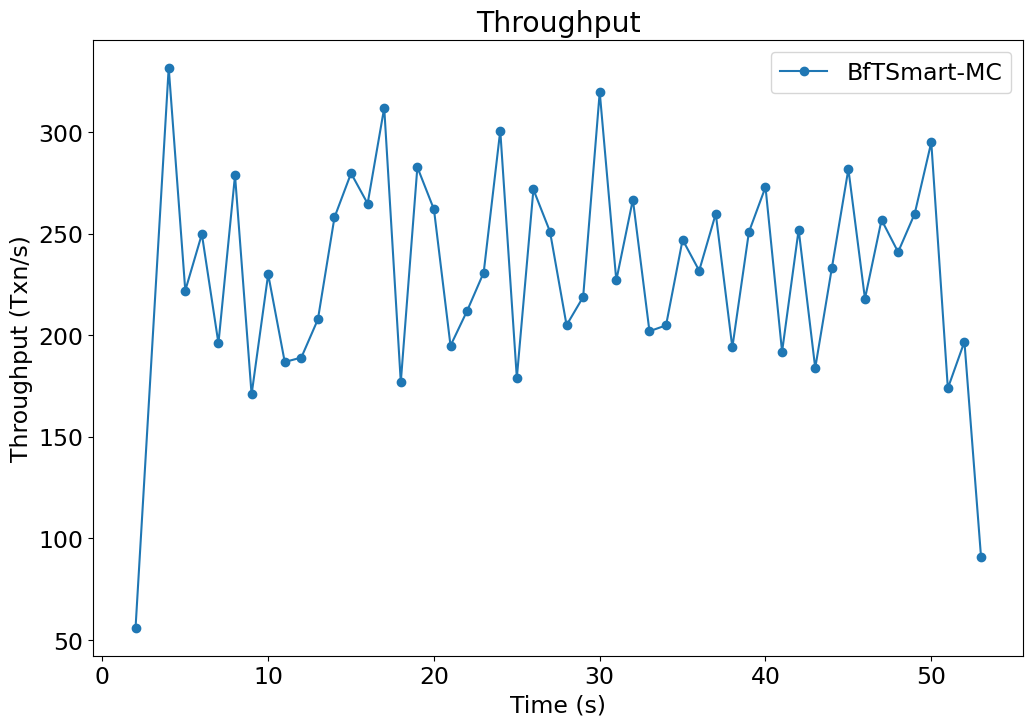

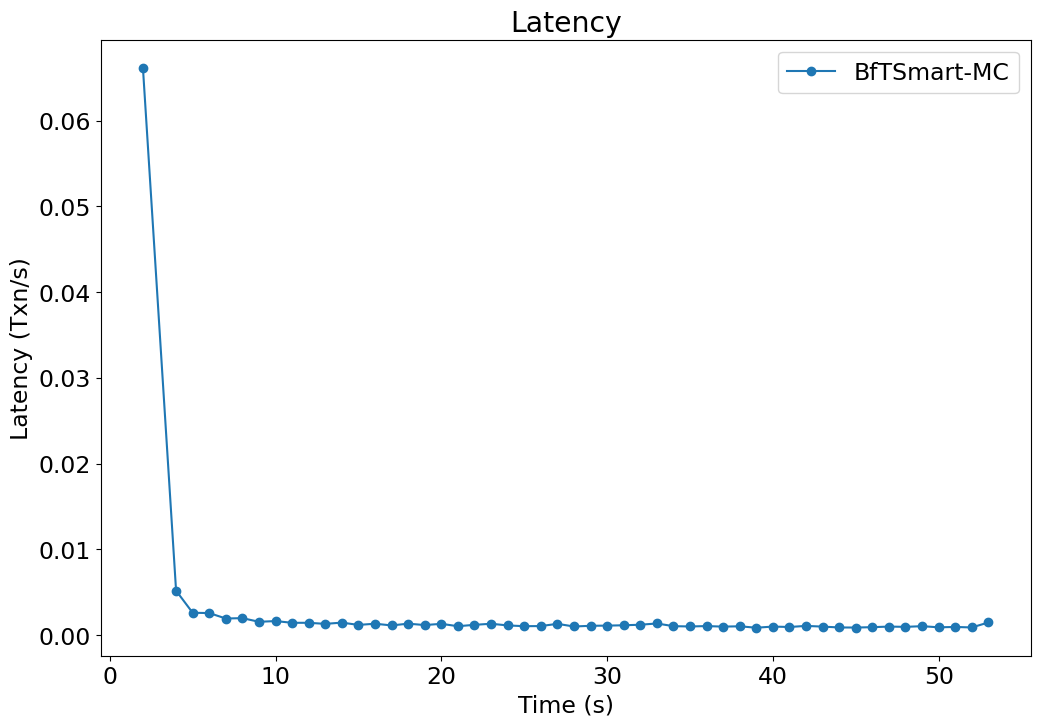

/home/tejas/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/tejas/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-00].
Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-01].
Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-02].
Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-03].
Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-04].
Deleted [https://www.googleapis.com/compute/v1/pr

gcloud compute scp --zone "europe-west3-c" commands.sh resdb-08:/home/tejas/commands.sh
gcloud compute scp --zone "europe-west3-c" commands.sh resdb-06:/home/tejas/commands.sh
gcloud compute scp --zone "europe-west3-c" commands.sh resdb-00:/home/tejas/commands.sh
gcloud compute scp --zone "europe-west3-c" commands.sh resdb-05:/home/tejas/commands.sh
gcloud compute scp --zone "asia-south1-c" commands.sh resdb-13:/home/tejas/commands.sh
gcloud compute scp --zone "asia-south1-c" commands.sh resdb-12:/home/tejas/commands.sh
gcloud compute scp --zone "europe-west3-c" commands.sh resdb-03:/home/tejas/commands.sh
gcloud compute scp --zone "europe-west3-c" commands.sh resdb-07:/home/tejas/commands.sh
gcloud compute scp --zone "europe-west3-c" commands.sh resdb-02:/home/tejas/commands.sh
gcloud compute scp --zone "europe-west3-c" commands.sh resdb-04:/home/tejas/commands.sh
gcloud compute scp --zone "asia-south1-c" commands.sh resdb-11:/home/tejas/commands.sh
gcloud compute scp --zone "asia-sou

In [20]:
# # %%notify

for cfig in config_list:
    
    
    run_bftsmart_mc(cfig)
    
    
    os.system('gcloud compute instances delete --zone=europe-west3-c --quiet $(gcloud compute instances list --format="value(name)")')
    os.system('gcloud compute instances delete --zone=asia-south1-c --quiet $(gcloud compute instances list --format="value(name)")')
    os.system('gcloud compute instances delete --zone=us-west1-b --quiet $(gcloud compute instances list --format="value(name)")')